**Problem Statement**

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette()
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Replacing Column Names:

In [4]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('[','_').str.replace(']','').str.replace('/','_by_').str.replace('-','_').str.replace('.','')
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_by_Liabilities_  

In [6]:
# Number of Rows and columns in the data set:
print('The total number of rows in data set df :', df.shape[0])
print('The total number of columns in data set df :', df.shape[1])

The total number of rows in data set df : 3586
The total number of columns in data set df : 67


In [7]:
df.duplicated().sum()

0

There are no duplicate entries present in the data set

In [8]:
df.isnull().sum().sum()

118

There are a total of 118 missing values in the data set:
1. Inventory_Velocity_Days = 103
2. Current_Ratio_Latest = 1
3. Fixed_Assets_Ratio_Latest = 1
4. Inventory_Ratio_Latest = 1
5. Debtors_Ratio_Latest = 1
6. Total_Asset_Turnover_Ratio_Latest = 1
7. Interest_Cover_Ratio_Latest = 1
8. PBIDTM_perc_Latest = 1
9. PBITM_perc_Latest  = 1
10. PBDTM_perc_Latest = 1
11. CPM_perc_Latest   = 1
12. APATM_perc_Latest = 1

In [9]:
#pd.set_option('display.max_rows', None)
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.0,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.0,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.0,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.0,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.0,603.89,10636.76,0.00,8.00,49.00,106.00,514721.00
Creditors_Velocity_Days,3586.0,2057.85,54169.48,0.00,8.00,39.00,89.00,2034145.00
Inventory_Velocity_Days,3483.0,79.64,137.85,-199.00,0.00,35.00,96.00,996.00
Value_of_Output_by_Total_Assets,3586.0,0.82,1.20,-0.33,0.07,0.48,1.16,17.63


In [10]:
#Removing Co_Name and Co_Code as these are unique identifiers
df1 = df.drop(['Co_Name','Co_Code'], axis=1)

In [11]:
df1.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_by_Liabilities_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Creating target column "Default" as per the guideline mentioned that is

if Networth_Next_Year < 0 --- 1

if Networth_Next_Year > 0 --- 0

In [12]:
df1['Default'] = np.where((df1['Networth_Next_Year'] > 0), 0, 1)

In [13]:
df1[['Default','Networth_Next_Year']].head(10)

,Default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [14]:
df1['Default'].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [15]:
df1['Default'].value_counts(normalize=True)

0    0.891801
1    0.108199
Name: Default, dtype: float64

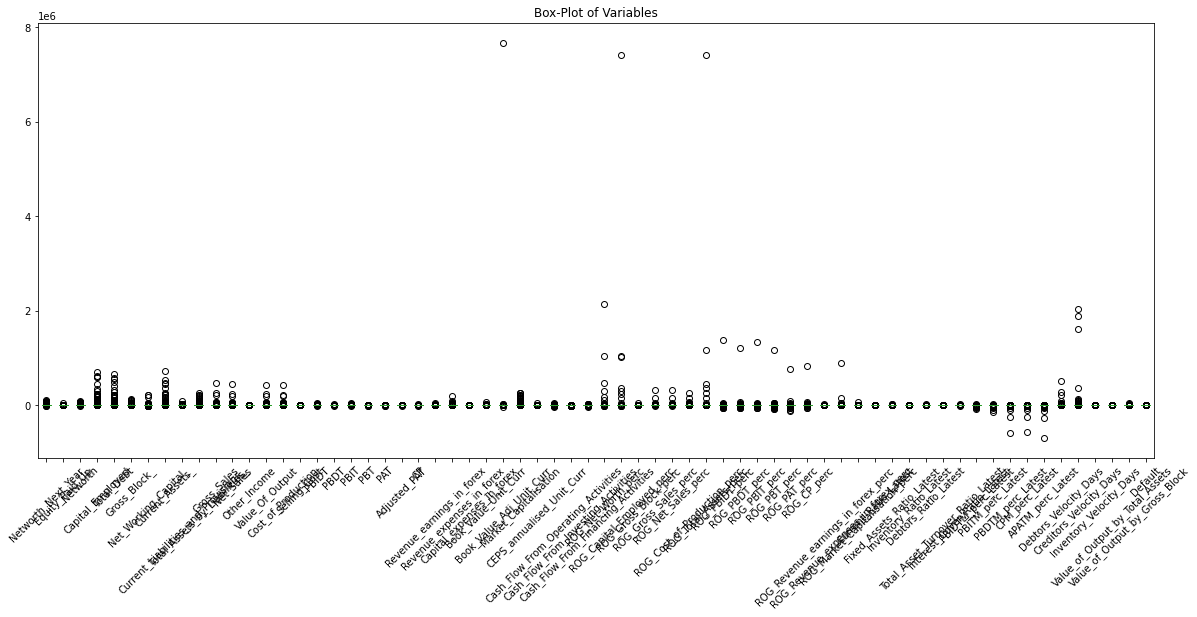

In [16]:
plt.rcParams['figure.figsize'] = (20,8)
df1.plot(kind='box', rot=45 )
plt.title('Box-Plot of Variables');

Noticeably, there are outliers present in the data set for various independant variables. 

In [17]:
company = df1.copy()
company_X = company.drop(['Default','Networth_Next_Year'], axis=1)
company_y = company['Default']  # dropping Networth_Next_Year since Default is derived from this column

In [18]:
# Dectect Outliers
Q1 = company_X.quantile(0.25)
Q3 = company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + (1.5*IQR)
LL = Q1 - (1.5*IQR)

In [19]:
((company_X > UL) | (company_X < LL)).sum()

Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
Gross_Block_                       540
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            262
Value_of_Output_by_Total_Assets    150
Value_of_Output_by_Gross_Block     481
Length: 64, dtype: int64

In [20]:
((company_X > UL) | (company_X < LL)).sum().sum()

41355

In [21]:
company_X.size

229504

In [22]:
print('% of outliers in the data set :',round((((company_X > UL) | (company_X < LL)).sum().sum()/company_X.size *100),2))
print('% of missing values in the data set :',round((df.isnull().sum().sum()/df.size *100),2))

% of outliers in the data set : 18.02
% of missing values in the data set : 0.05


#### Treating Missing Values:

In [23]:
#since missing values is very less in the data set we can impute these values:
impute = IterativeImputer()
company_X = pd.DataFrame(impute.fit_transform(company_X), columns=company_X.columns)

In [24]:
company_X.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block_                       0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 64, dtype: int64

#### Outlier Removal

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for column in company_X.columns:
    lr,ur=remove_outlier(company_X[column])
    company_X[column]=np.where(company_X[column]>ur,ur,company_X[column])
    company_X[column]=np.where(company_X[column]<lr,lr,company_X[column])

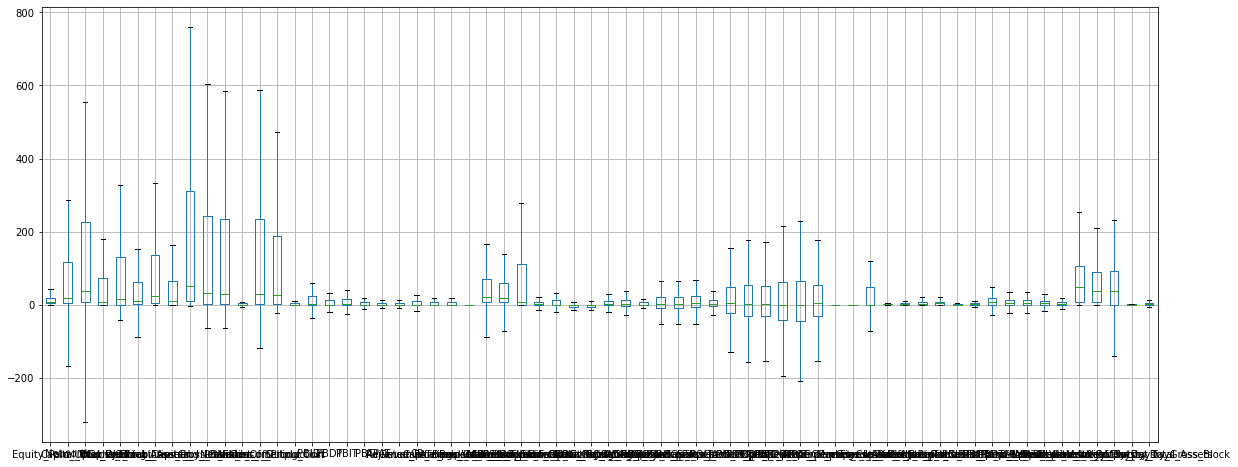

In [27]:
company_X.boxplot();

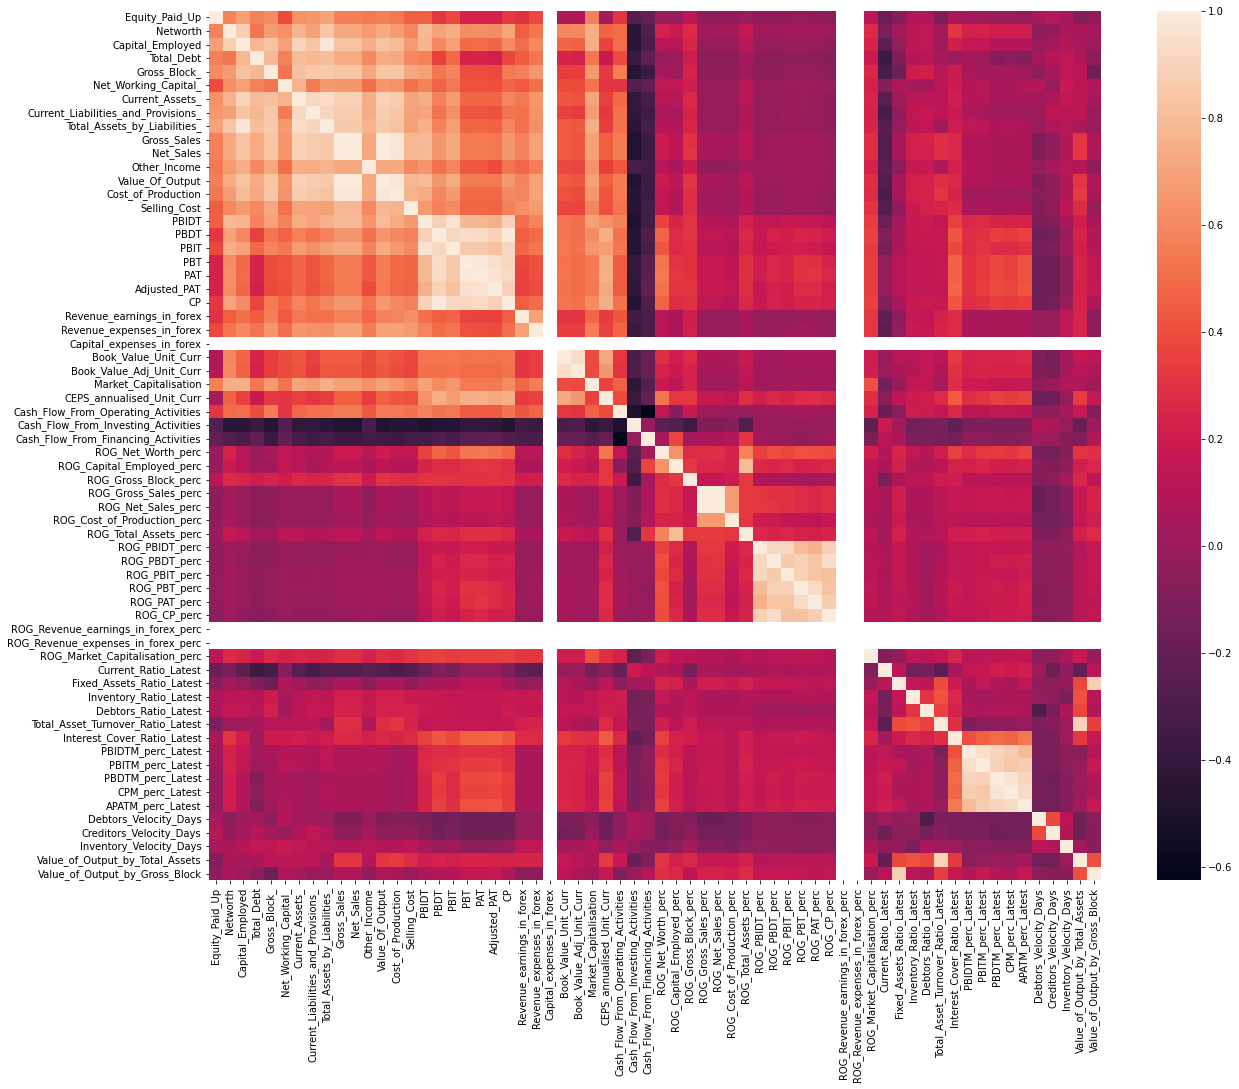

In [28]:
plt.figure(figsize=(20,16))
sns.heatmap(company_X.corr());

There are variables that are highly correlated to each other as seen from the heatmap.

In [29]:
company_X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_by_Liabilities_,Gross_Sales,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,43.16875,-166.215,-320.90125,180.83,328.8825,-89.40625,40.50000,163.02625,109.6000,0.00000,...,0.00000,0.0000,0.00,0.00000,0.00000,0.0,0.0,45.0,0.00,0.00
1,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,...,-10.30000,-21.4275,-21.15,-17.08125,-11.11125,29.0,101.0,2.0,0.31,0.24
2,43.16875,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,392.13000,...,-28.48125,-21.4275,-21.15,-17.08125,-11.11125,97.0,210.5,0.0,-0.03,-0.26
3,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,...,-3.33000,-7.2100,-21.15,-17.08125,-11.11125,93.0,63.0,2.0,0.24,1.90
4,43.16875,-166.215,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,38.72000,...,-28.48125,-21.4275,-21.15,28.46875,18.51875,253.0,210.5,0.0,0.01,0.05


#### CALCULATING VARIANCE INFLATION FACTORS TO ELIMINATE MULTI-COLLINEARLITY

In [30]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
calc_vif(company_X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Net_Sales,1699.527641
9,Gross_Sales,961.759443
12,Value_Of_Output,693.875759
35,ROG_Gross_Sales_perc,541.786524
36,ROG_Net_Sales_perc,541.289887
...,...,...
47,ROG_Market_Capitalisation_perc,1.672321
34,ROG_Gross_Block_perc,1.582069
24,Capital_expenses_in_forex,NaN
45,ROG_Revenue_earnings_in_forex_perc,NaN


In [32]:
X = company_X.drop('Net_Sales', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
34,ROG_Gross_Sales_perc,526.191296
35,ROG_Net_Sales_perc,525.257679
9,Gross_Sales,416.347980
11,Value_Of_Output,405.383299
15,PBDT,117.760915
...,...,...
46,ROG_Market_Capitalisation_perc,1.672321
33,ROG_Gross_Block_perc,1.581936
23,Capital_expenses_in_forex,NaN
44,ROG_Revenue_earnings_in_forex_perc,NaN


In [33]:
X = X.drop('ROG_Gross_Sales_perc', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,Gross_Sales,411.336876
11,Value_Of_Output,400.810022
15,PBDT,117.297579
8,Total_Assets_by_Liabilities_,104.947016
20,CP,103.838017
...,...,...
45,ROG_Market_Capitalisation_perc,1.672171
33,ROG_Gross_Block_perc,1.580014
23,Capital_expenses_in_forex,NaN
43,ROG_Revenue_earnings_in_forex_perc,NaN


In [34]:
X = X.drop('Gross_Sales', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,PBDT,117.277616
8,Total_Assets_by_Liabilities_,104.924217
19,CP,103.816766
17,PAT,76.527917
16,PBT,75.220927
...,...,...
44,ROG_Market_Capitalisation_perc,1.671418
32,ROG_Gross_Block_perc,1.579919
22,Capital_expenses_in_forex,NaN
42,ROG_Revenue_earnings_in_forex_perc,NaN


In [35]:
X = X.drop('PBDT', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,Total_Assets_by_Liabilities_,104.831342
2,Capital_Employed,73.117572
16,PAT,67.343524
10,Value_Of_Output,58.280873
15,PBT,55.265457
11,Cost_of_Production,47.150377
6,Current_Assets_,33.146012
53,CPM_perc_Latest,32.941674
50,PBIDTM_perc_Latest,32.591021
13,PBIDT,32.053359


In [36]:
X = X.drop('Total_Assets_by_Liabilities_', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,PAT,67.321394
9,Value_Of_Output,58.199655
14,PBT,55.236308
10,Cost_of_Production,46.955162
52,CPM_perc_Latest,32.937635
49,PBIDTM_perc_Latest,32.499053
12,PBIDT,31.629090
6,Current_Assets_,31.164165
50,PBITM_perc_Latest,30.175292
13,PBIT,29.222476


In [37]:
X = X.drop('PAT', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,Value_Of_Output,58.068986
10,Cost_of_Production,46.934151
51,CPM_perc_Latest,32.937269
48,PBIDTM_perc_Latest,32.498905
12,PBIDT,31.496523
6,Current_Assets_,31.163281
49,PBITM_perc_Latest,30.169167
13,PBIT,29.222117
50,PBDTM_perc_Latest,27.602082
34,ROG_PBDT_perc,24.374815


In [38]:
X = X.drop('Value_Of_Output', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
50,CPM_perc_Latest,32.744055
47,PBIDTM_perc_Latest,32.218622
6,Current_Assets_,31.121412
11,PBIDT,30.467440
48,PBITM_perc_Latest,29.999580
12,PBIT,29.216913
49,PBDTM_perc_Latest,27.593723
33,ROG_PBDT_perc,24.370278
2,Capital_Employed,23.927981
13,PBT,21.699999


In [39]:
X = X.drop('CPM_perc_Latest', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,Current_Assets_,31.045110
11,PBIDT,30.461389
12,PBIT,29.215773
47,PBIDTM_perc_Latest,25.418151
33,ROG_PBDT_perc,24.367408
2,Capital_Employed,23.925149
48,PBITM_perc_Latest,21.979536
13,PBT,21.646856
35,ROG_PBT_perc,18.966382
15,CP,18.510371


In [40]:
X = X.drop('Current_Assets_', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,PBIDT,30.440433
11,PBIT,29.187497
46,PBIDTM_perc_Latest,25.403841
32,ROG_PBDT_perc,24.359019
47,PBITM_perc_Latest,21.965820
12,PBT,21.595206
2,Capital_Employed,21.342623
34,ROG_PBT_perc,18.948782
14,CP,18.509190
36,ROG_CP_perc,17.896105


In [41]:
X = X.drop('PBIDT', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
45,PBIDTM_perc_Latest,25.071943
31,ROG_PBDT_perc,24.245189
46,PBITM_perc_Latest,21.816373
2,Capital_Employed,21.326730
11,PBT,21.156793
33,ROG_PBT_perc,18.874992
35,ROG_CP_perc,17.862767
47,PBDTM_perc_Latest,17.674026
13,CP,17.306500
17,Book_Value_Unit_Curr,16.732346


In [42]:
X = X.drop('PBIDTM_perc_Latest', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
31,ROG_PBDT_perc,24.243386
2,Capital_Employed,21.271297
11,PBT,21.156174
33,ROG_PBT_perc,18.854414
35,ROG_CP_perc,17.861795
13,CP,17.305585
17,Book_Value_Unit_Curr,16.732186
30,ROG_PBIDT_perc,14.524207
12,Adjusted_PAT,14.517565
34,ROG_PAT_perc,14.130223


In [43]:
X = X.drop('ROG_PBDT_perc', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Capital_Employed,21.271297
11,PBT,21.153436
13,CP,17.175163
17,Book_Value_Unit_Curr,16.731625
12,Adjusted_PAT,14.508798
18,Book_Value_Adj_Unit_Curr,13.092548
10,PBIT,12.806757
50,Value_of_Output_by_Total_Assets,12.705986
1,Networth,12.221408
30,ROG_PBIDT_perc,11.885322


In [44]:
X = X.drop('Capital_Employed', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,PBT,21.146681
12,CP,17.094530
16,Book_Value_Unit_Curr,16.703128
11,Adjusted_PAT,14.493100
17,Book_Value_Adj_Unit_Curr,13.063844
9,PBIT,12.768896
49,Value_of_Output_by_Total_Assets,12.633650
29,ROG_PBIDT_perc,11.880755
30,ROG_PBIT_perc,11.631872
7,Cost_of_Production,11.430032


In [45]:
X = X.drop('PBT', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,Book_Value_Unit_Curr,16.692411
11,CP,15.729075
16,Book_Value_Adj_Unit_Curr,13.057476
48,Value_of_Output_by_Total_Assets,12.629729
9,PBIT,12.058916
28,ROG_PBIDT_perc,11.800522
29,ROG_PBIT_perc,11.489180
7,Cost_of_Production,11.425222
31,ROG_PAT_perc,11.247071
40,Total_Asset_Turnover_Ratio_Latest,11.119846


In [46]:
X = X.drop('Book_Value_Unit_Curr', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,CP,15.380785
47,Value_of_Output_by_Total_Assets,12.628794
9,PBIT,12.051781
27,ROG_PBIDT_perc,11.799943
28,ROG_PBIT_perc,11.489147
7,Cost_of_Production,11.425120
30,ROG_PAT_perc,11.243931
39,Total_Asset_Turnover_Ratio_Latest,11.118321
3,Gross_Block_,10.976575
5,Current_Liabilities_and_Provisions_,10.769255


In [47]:
X = X.drop('CP', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
46,Value_of_Output_by_Total_Assets,12.625103
26,ROG_PBIDT_perc,11.671190
27,ROG_PBIT_perc,11.488129
7,Cost_of_Production,11.422862
29,ROG_PAT_perc,11.215068
38,Total_Asset_Turnover_Ratio_Latest,11.108264
5,Current_Liabilities_and_Provisions_,10.614073
3,Gross_Block_,10.439744
41,PBDTM_perc_Latest,10.251147
28,ROG_PBT_perc,10.136245


In [48]:
X = X.drop('Value_of_Output_by_Total_Assets', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
26,ROG_PBIDT_perc,11.668992
27,ROG_PBIT_perc,11.484997
7,Cost_of_Production,11.339368
29,ROG_PAT_perc,11.215031
5,Current_Liabilities_and_Provisions_,10.476541
3,Gross_Block_,10.439731
41,PBDTM_perc_Latest,10.248149
28,ROG_PBT_perc,10.135849
30,ROG_CP_perc,8.910363
35,Fixed_Assets_Ratio_Latest,8.017383


In [49]:
X = X.drop('ROG_PBIDT_perc', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,Cost_of_Production,11.339136
5,Current_Liabilities_and_Provisions_,10.476297
3,Gross_Block_,10.439721
40,PBDTM_perc_Latest,10.246777
27,ROG_PBT_perc,10.113361
28,ROG_PAT_perc,9.577998
34,Fixed_Assets_Ratio_Latest,8.017118
41,APATM_perc_Latest,7.954712
9,PBIT,7.840332
45,Value_of_Output_by_Gross_Block,7.837806


In [50]:
X = X.drop('Cost_of_Production', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
39,PBDTM_perc_Latest,10.243975
26,ROG_PBT_perc,10.113147
3,Gross_Block_,9.613971
27,ROG_PAT_perc,9.576086
5,Current_Liabilities_and_Provisions_,9.259664
33,Fixed_Assets_Ratio_Latest,8.006560
40,APATM_perc_Latest,7.954677
8,PBIT,7.832573
44,Value_of_Output_by_Gross_Block,7.824455
38,PBITM_perc_Latest,7.598536


In [51]:
X = X.drop('PBDTM_perc_Latest', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
26,ROG_PBT_perc,10.085564
27,ROG_PAT_perc,9.539863
3,Gross_Block_,9.529391
5,Current_Liabilities_and_Provisions_,9.226188
33,Fixed_Assets_Ratio_Latest,7.985077
43,Value_of_Output_by_Gross_Block,7.806443
8,PBIT,7.785751
1,Networth,7.233661
2,Total_Debt,5.988526
9,Adjusted_PAT,5.691150


In [52]:
X = X.drop('ROG_PBT_perc', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Gross_Block_,9.527333
5,Current_Liabilities_and_Provisions_,9.224202
32,Fixed_Assets_Ratio_Latest,7.980475
42,Value_of_Output_by_Gross_Block,7.806429
8,PBIT,7.751099
1,Networth,7.232015
2,Total_Debt,5.987979
9,Adjusted_PAT,5.669105
38,APATM_perc_Latest,5.558446
37,PBITM_perc_Latest,5.421665


In [53]:
X = X.drop('Gross_Block_', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Current_Liabilities_and_Provisions_,8.123581
31,Fixed_Assets_Ratio_Latest,7.932401
41,Value_of_Output_by_Gross_Block,7.744911
7,PBIT,7.727593
1,Networth,7.169431
8,Adjusted_PAT,5.660170
37,APATM_perc_Latest,5.535141
36,PBITM_perc_Latest,5.384244
25,ROG_PAT_perc,5.373743
2,Total_Debt,5.259503


In [54]:
X = X.drop('Current_Liabilities_and_Provisions_', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
30,Fixed_Assets_Ratio_Latest,7.931087
40,Value_of_Output_by_Gross_Block,7.744569
6,PBIT,7.680277
1,Networth,7.120266
7,Adjusted_PAT,5.659974
36,APATM_perc_Latest,5.529885
24,ROG_PAT_perc,5.373559
35,PBITM_perc_Latest,5.371740
25,ROG_CP_perc,4.898922
13,CEPS_annualised_Unit_Curr,4.855787


In [55]:
X = X.drop('Fixed_Assets_Ratio_Latest', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,PBIT,7.679938
1,Networth,7.119883
7,Adjusted_PAT,5.657424
35,APATM_perc_Latest,5.527405
24,ROG_PAT_perc,5.373533
34,PBITM_perc_Latest,5.369862
25,ROG_CP_perc,4.898438
13,CEPS_annualised_Unit_Curr,4.848809
12,Market_Capitalisation,4.462743
2,Total_Debt,4.309854


In [56]:
X = X.drop('PBIT', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Networth,6.764537
34,APATM_perc_Latest,5.452692
23,ROG_PAT_perc,5.289023
33,PBITM_perc_Latest,5.264030
24,ROG_CP_perc,4.898157
12,CEPS_annualised_Unit_Curr,4.692699
11,Market_Capitalisation,4.456708
0,Equity_Paid_Up,4.168856
2,Total_Debt,4.131080
5,Selling_Cost,4.081705


In [57]:
X = X.drop('Networth', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
33,APATM_perc_Latest,5.444068
22,ROG_PAT_perc,5.280255
32,PBITM_perc_Latest,5.256732
23,ROG_CP_perc,4.896783
11,CEPS_annualised_Unit_Curr,4.591138
1,Total_Debt,4.124280
10,Market_Capitalisation,4.109796
4,Selling_Cost,4.079715
21,ROG_PBIT_perc,3.909656
16,ROG_Capital_Employed_perc,3.871609


In [58]:
X = X.drop('APATM_perc_Latest', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
22,ROG_PAT_perc,5.280255
23,ROG_CP_perc,4.888969
11,CEPS_annualised_Unit_Curr,4.586612
10,Market_Capitalisation,4.109510
4,Selling_Cost,4.077633
1,Total_Debt,4.059214
21,ROG_PBIT_perc,3.904540
16,ROG_Capital_Employed_perc,3.859419
0,Equity_Paid_Up,3.819646
5,Adjusted_PAT,3.698831


In [59]:
X = X.drop('ROG_PAT_perc', axis=1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,CEPS_annualised_Unit_Curr,4.586599
10,Market_Capitalisation,4.105857
4,Selling_Cost,4.077582
1,Total_Debt,4.055814
16,ROG_Capital_Employed_perc,3.856555
0,Equity_Paid_Up,3.819621
3,Other_Income,3.668680
7,Revenue_expenses_in_forex,3.658646
5,Adjusted_PAT,3.636112
12,Cash_Flow_From_Operating_Activities,3.598052


In [60]:
X = X.drop(['Capital_expenses_in_forex','ROG_Revenue_earnings_in_forex_perc','ROG_Revenue_expenses_in_forex_perc'], axis=1)

In [61]:
X.head()

,Equity_Paid_Up,Total_Debt,Net_Working_Capital_,Other_Income,Selling_Cost,Adjusted_PAT,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Book_Value_Adj_Unit_Curr,Market_Capitalisation,...,Current_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBITM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Gross_Block
0,43.16875,180.83,-89.40625,7.6000,0.00000,-8.23875,0.00,0.00000,-72.71625,0.00000,...,0.02,0.00,0.00,0.00,-0.20,0.0000,0.0,0.0,45.0,0.00
1,43.16875,180.83,-89.40625,9.0575,9.70625,-8.23875,6.35,17.46875,-15.18000,278.64375,...,0.08,22.35,10.35,0.30,-0.84,-21.4275,29.0,101.0,2.0,0.24
2,43.16875,180.83,151.52375,9.0575,9.70625,-8.23875,0.00,17.46875,94.14000,278.64375,...,1.06,0.01,0.42,0.00,-2.21,-21.4275,97.0,210.5,0.0,-0.26
3,43.16875,180.83,-89.40625,9.0575,3.34000,-8.23875,0.89,17.46875,-39.64000,194.27000,...,0.09,22.35,9.26,0.00,-0.16,-7.2100,93.0,63.0,2.0,1.90
4,43.16875,180.83,151.52375,9.0575,1.97000,-8.23875,0.00,15.62000,-72.71625,113.68000,...,0.50,0.02,1.28,0.01,-0.73,-21.4275,253.0,210.5,0.0,0.05


#### Features with high VIF eliminated from the data set to reduce multi-collinearity
1. Net_Sales
2. ROG_Gross_Sales_perc
3. Gross_Sales
4. PBDT
5. Total_Assets_by_Liabilities_
6. PAT
7. Value_Of_Output
8. CPM_perc_Latest
9. Current_Assets_
10. PBIDT
11. PBIDTM_perc_Latest
12. ROG_PBDT_perc
13. Capital_Employed
14. PBT
15. Book_Value_Unit_Curr
16. CP
17. Value_of_Output_by_Total_Assets
18. ROG_PBIDT_perc
19. Cost_of_Production
20. PBDTM_perc_Latest
21. ROG_PBT_perc
22. Gross_Block_
23. Current_Liabilities_and_Provisions_
24. Fixed_Assets_Ratio_Latest
25. PBIT
26. Networth
27. APATM_perc_Latest
28. ROG_PAT_perc
28. Capital_expenses_in_forex
30. ROG_Revenue_earnings_in_forex_perc
31. ROG_Revenue_expenses_in_forex_perc

#### TRAIN TEST SPLIT:

In [62]:
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(scaled_predictors, company_y, test_size = 0.33, random_state = 42)

In [64]:
X_train.shape

(2402, 33)

In [65]:
X_test.shape

(1184, 33)

In [66]:
y_train.shape, y_test.shape

((2402,), (1184,))

In [67]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [68]:
Default_train.shape

(2402, 34)

In [69]:
Default_test.shape

(1184, 34)

#### MODEL 1:

In [70]:
formula = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Gross_Block'

In [71]:
model1 = SM.logit(formula=formula, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114846
         Iterations 11


In [72]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6514
Time:                        16:06:11   Log-Likelihood:                -275.86
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.927e-195
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0491      0.470    -15.000      0.000      -7.970      -6.128
Equity_Paid_Up                         -0.4165      0.17

**ROG_Cost_of_Production_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 2:

In [73]:
formula2 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Inventory_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'

In [74]:
model2 = SM.logit(formula=formula2, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114847
         Iterations 11


In [75]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           32
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6514
Time:                        16:06:12   Log-Likelihood:                -275.86
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.120e-196
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0480      0.469    -15.012      0.000      -7.968      -6.128
Equity_Paid_Up                         -0.4163      0.175     -2.382      0.017      -0.759      -0.074
Total_Debt                              0.8862      0.261      3.395      0.001       0.375       1.398
Net_Working_Capital_                   -0.1893      0.228     -0.830      0.406      -0.636       0.257
Other_Income                            0.1795      0.210      0.855      0.392      -0.232       0.591
Selling_Cost                            0.0526      0.279      0.189      0.850      -0.494       0.599
Adjusted_PAT                            0.0769      0.279      0.276      0.783      -0.470       0.624
Revenue_earnings_in_forex               0.0633      0.226      0.281      0.779      -0.379       0.506
Revenue_expenses_in_forex               0.2020      0.232      0.872      0.383      -0.252       0.656
Book_Value_Adj_Unit_Curr               -5.7841      0.577    -10.019      0.000      -6.916      -4.653
Market_Capitalisation                  -0.4509      0.267     -1.690      0.091      -0.974       0.072
CEPS_annualised_Unit_Curr              -0.7237      0.332     -2.179      0.029      -1.375      -0.073
Cash_Flow_From_Operating_Activities    -0.4986      0.312     -1.599      0.110      -1.110       0.112
Cash_Flow_From_Investing_Activities    -0.2531      0.260     -0.974      0.330      -0.762       0.256
Cash_Flow_From_Financing_Activities    -0.1451      0.288     -0.504      0.614      -0.710       0.419
ROG_Net_Worth_perc                     -0.2428      0.152     -1.593      0.111      -0.542       0.056
ROG_Capital_Employed_perc               0.3347      0.171      1.957      0.050      -0.001       0.670
ROG_Gross_Block_perc                   -0.1152      0.159     -0.724      0.469      -0.427       0.197
ROG_Net_Sales_perc                     -0.0741      0.117     -0.633      0.527      -0.303       0.155
ROG_Total_Assets_perc                  -0.2891      0.168     -1.718      0.086      -0.619       0.041
ROG_PBIT_perc                           0.0730      0.181      0.404      0.686      -0.281       0.427
ROG_CP_perc                            -0.0734      0.182     -0.402      0.687      -0.431       0.284
ROG_Market_Capitalisation_perc         -0.0897      0.137     -0.653      0.514      -0.359       0.180
Current_Ratio_Latest                   -0.9114      0.163     -5.606      0.000      -1.230      -0.593
Inventory_Ratio_Latest                 -0.2458      0.155     -1.582      0.114      -0.550       0.059
Debtors_Ratio_Latest                   -0.3428      0.165     -2.083      0.037      -0.665      -0.020
Total_Asset_Turnover_Ratio_Latest       0.1746      0.170      1.028      0.304      -0.158       0.507
Interest_Cover_Ratio_Latest            -0.2860      0.190     -1.509      0.131      -0.657       0.085
PBITM_perc_Latest

**Inventory_Velocity_Days is an insignificant variable, therefore, we will eliminate it**

#### MODEL 3:

In [76]:
formula3 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'

In [77]:
model3 = SM.logit(formula=formula3, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114849
         Iterations 11


In [78]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6514
Time:                        16:06:12   Log-Likelihood:                -275.87
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                8.827e-197
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0464      0.469    -15.023      0.000      -7.966      -6.127
Equity_Paid_Up                         -0.4170      0.175     -2.388      0.017      -0.759      -0.075
Total_Debt                              0.8871      0.261      3.401      0.001       0.376       1.398
Net_Working_Capital_                   -0.1875      0.227     -0.826      0.409      -0.632       0.257
Other_Income                            0.1785      0.210      0.852      0.394      -0.232       0.589
Selling_Cost                            0.0518      0.279      0.186      0.853      -0.494       0.598
Adjusted_PAT                            0.0746      0.278      0.269      0.788      -0.470       0.619
Revenue_earnings_in_forex               0.0649      0.225      0.289      0.773      -0.376       0.506
Revenue_expenses_in_forex               0.2020      0.232      0.871      0.384      -0.252       0.656
Book_Value_Adj_Unit_Curr               -5.7801      0.575    -10.050      0.000      -6.907      -4.653
Market_Capitalisation                  -0.4495      0.266     -1.688      0.091      -0.971       0.072
CEPS_annualised_Unit_Curr              -0.7226      0.332     -2.177      0.029      -1.373      -0.072
Cash_Flow_From_Operating_Activities    -0.4997      0.311     -1.604      0.109      -1.110       0.111
Cash_Flow_From_Investing_Activities    -0.2533      0.260     -0.975      0.329      -0.763       0.256
Cash_Flow_From_Financing_Activities    -0.1461      0.288     -0.508      0.612      -0.710       0.418
ROG_Net_Worth_perc                     -0.2433      0.152     -1.597      0.110      -0.542       0.055
ROG_Capital_Employed_perc               0.3344      0.171      1.956      0.050      -0.001       0.669
ROG_Gross_Block_perc                   -0.1146      0.159     -0.720      0.471      -0.426       0.197
ROG_Net_Sales_perc                     -0.0739      0.117     -0.632      0.528      -0.303       0.155
ROG_Total_Assets_perc                  -0.2894      0.168     -1.720      0.085      -0.619       0.040
ROG_PBIT_perc                           0.0724      0.181      0.401      0.689      -0.281       0.426
ROG_CP_perc                            -0.0725      0.182     -0.398      0.691      -0.429       0.285
ROG_Market_Capitalisation_perc         -0.0894      0.137     -0.651      0.515      -0.359       0.180
Current_Ratio_Latest                   -0.9107      0.162     -5.610      0.000      -1.229      -0.593
Inventory_Ratio_Latest                 -0.2473      0.154     -1.603      0.109      -0.550       0.055
Debtors_Ratio_Latest                   -0.3412      0.163     -2.087      0.037      -0.662      -0.021
Total_Asset_Turnover_Ratio_Latest       0.1762      0.169      1.043      0.297      -0.155       0.507
Interest_Cover_Ratio_Latest            -0.2863      0.189     -1.511      0.131      -0.658       0.085
PBITM_perc_Latest

**Selling_Cost is an insignificant variable, therefore, we will eliminate it**

#### MODEL 4:

In [79]:
formula4 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'

In [80]:
model4 = SM.logit(formula=formula4, data=Default_train).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.114856
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6514
Time:                        16:06:13   Log-Likelihood:                -275.88
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.517e-197
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0512      0.469    -15.042      0.000      -7.970      -6.132
Equity_Paid_Up                         -0.4178      0.175     -2.394      0.017      -0.760      -0.076
Total_Debt                              0.8949      0.257      3.481      0.000       0.391       1.399
Net_Working_Capital_                   -0.1825      0.225     -0.811      0.417      -0.623       0.259
Other_Income                            0.1867      0.205      0.912      0.362      -0.215       0.588
Adjusted_PAT                            0.0740      0.278      0.266      0.790      -0.470       0.618
Revenue_earnings_in_forex               0.0744      0.219      0.340      0.734      -0.355       0.503
Revenue_expenses_in_forex               0.2121      0.225      0.941      0.347      -0.230       0.654
Book_Value_Adj_Unit_Curr               -5.7853      0.574    -10.073      0.000      -6.911      -4.660
Market_Capitalisation                  -0.4452      0.265     -1.680      0.093      -0.964       0.074
CEPS_annualised_Unit_Curr              -0.7253      0.332     -2.186      0.029      -1.376      -0.075
Cash_Flow_From_Operating_Activities    -0.5064      0.310     -1.635      0.102      -1.113       0.101
Cash_Flow_From_Investing_Activities    -0.2662      0.250     -1.063      0.288      -0.757       0.224
Cash_Flow_From_Financing_Activities    -0.1561      0.283     -0.552      0.581      -0.711       0.398
ROG_Net_Worth_perc                     -0.2440      0.152     -1.600      0.110      -0.543       0.055
ROG_Capital_Employed_perc               0.3336      0.171      1.952      0.051      -0.001       0.669
ROG_Gross_Block_perc                   -0.1139      0.159     -0.716      0.474      -0.426       0.198
ROG_Net_Sales_perc                     -0.0736      0.117     -0.629      0.530      -0.303       0.156
ROG_Total_Assets_perc                  -0.2877      0.168     -1.713      0.087      -0.617       0.041
ROG_PBIT_perc                           0.0725      0.180      0.402      0.688      -0.281       0.426
ROG_CP_perc                            -0.0731      0.182     -0.402      0.688      -0.430       0.284
ROG_Market_Capitalisation_perc         -0.0909      0.137     -0.663      0.508      -0.360       0.178
Current_Ratio_Latest                   -0.9097      0.162     -5.605      0.000      -1.228      -0.592
Inventory_Ratio_Latest                 -0.2496      0.154     -1.623      0.105      -0.551       0.052
Debtors_Ratio_Latest                   -0.3373      0.162     -2.081      0.037      -0.655      -0.020
Total_Asset_Turnover_Ratio_Latest       0.1789      0.168      1.064      0.287      -0.151       0.508
Interest_Cover_Ratio_Latest            -0.2850      0.189     -1.506      0.132      -0.656       0.086
PBITM_perc_Latest                      -0.5384      0.152     -3.544      0.000      -0.836      -0.241
Debtors_Velocity_

**Adjusted_PAT is an insignificant variable, therefore, we will eliminate it**

#### MODEL 5:

In [81]:
formula5 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'

In [82]:
model5 = SM.logit(formula=formula5, data=Default_train).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.114870
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6513
Time:                        16:06:14   Log-Likelihood:                -275.92
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.608e-198
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0604      0.468    -15.078      0.000      -7.978      -6.143
Equity_Paid_Up                         -0.4248      0.173     -2.456      0.014      -0.764      -0.086
Total_Debt                              0.8831      0.254      3.479      0.001       0.386       1.381
Net_Working_Capital_                   -0.1773      0.225     -0.788      0.431      -0.619       0.264
Other_Income                            0.1752      0.200      0.874      0.382      -0.218       0.568
Revenue_earnings_in_forex               0.0800      0.218      0.367      0.714      -0.347       0.508
Revenue_expenses_in_forex               0.2108      0.226      0.935      0.350      -0.231       0.653
Book_Value_Adj_Unit_Curr               -5.7882      0.575    -10.069      0.000      -6.915      -4.661
Market_Capitalisation                  -0.4334      0.262     -1.656      0.098      -0.946       0.080
CEPS_annualised_Unit_Curr              -0.6909      0.304     -2.270      0.023      -1.287      -0.094
Cash_Flow_From_Operating_Activities    -0.5074      0.311     -1.631      0.103      -1.117       0.102
Cash_Flow_From_Investing_Activities    -0.2760      0.248     -1.113      0.266      -0.762       0.210
Cash_Flow_From_Financing_Activities    -0.1549      0.284     -0.545      0.586      -0.712       0.402
ROG_Net_Worth_perc                     -0.2318      0.145     -1.599      0.110      -0.516       0.052
ROG_Capital_Employed_perc               0.3319      0.171      1.944      0.052      -0.003       0.666
ROG_Gross_Block_perc                   -0.1102      0.158     -0.696      0.486      -0.420       0.200
ROG_Net_Sales_perc                     -0.0741      0.117     -0.634      0.526      -0.303       0.155
ROG_Total_Assets_perc                  -0.2899      0.168     -1.729      0.084      -0.619       0.039
ROG_PBIT_perc                           0.0722      0.180      0.401      0.689      -0.281       0.425
ROG_CP_perc                            -0.0719      0.182     -0.395      0.693      -0.428       0.284
ROG_Market_Capitalisation_perc         -0.0904      0.137     -0.658      0.511      -0.360       0.179
Current_Ratio_Latest                   -0.9090      0.162     -5.605      0.000      -1.227      -0.591
Inventory_Ratio_Latest                 -0.2521      0.154     -1.641      0.101      -0.553       0.049
Debtors_Ratio_Latest                   -0.3391      0.162     -2.092      0.036      -0.657      -0.021
Total_Asset_Turnover_Ratio_Latest       0.1773      0.168      1.056      0.291      -0.152       0.506
Interest_Cover_Ratio_Latest            -0.2815      0.189     -1.491      0.136      -0.651       0.089
PBITM_perc_Latest                      -0.5379      0.152     -3.543      0.000      -0.835      -0.240
Debtors_Velocity_Days                  -0.2994      0.116     -2.576      0.010      -0.527      -0.072
Creditors_Velocit

**Revenue_earnings_in_forex is an insignificant variable, therefore, we will eliminate it**

#### MODEL 6:

In [83]:
formula6 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model6 = SM.logit(formula=formula6, data=Default_train).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.114898
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6512
Time:                        16:06:15   Log-Likelihood:                -275.99
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.543e-199
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0532      0.468    -15.078      0.000      -7.970      -6.136
Equity_Paid_Up                         -0.4239      0.173     -2.447      0.014      -0.763      -0.084
Total_Debt                              0.8979      0.252      3.568      0.000       0.405       1.391
Net_Working_Capital_                   -0.1788      0.225     -0.795      0.426      -0.619       0.262
Other_Income                            0.1769      0.201      0.882      0.378      -0.216       0.570
Revenue_expenses_in_forex               0.2472      0.202      1.226      0.220      -0.148       0.642
Book_Value_Adj_Unit_Curr               -5.7739      0.573    -10.076      0.000      -6.897      -4.651
Market_Capitalisation                  -0.4305      0.261     -1.648      0.099      -0.943       0.082
CEPS_annualised_Unit_Curr              -0.6910      0.304     -2.273      0.023      -1.287      -0.095
Cash_Flow_From_Operating_Activities    -0.4993      0.310     -1.611      0.107      -1.107       0.108
Cash_Flow_From_Investing_Activities    -0.2718      0.247     -1.099      0.272      -0.757       0.213
Cash_Flow_From_Financing_Activities    -0.1558      0.284     -0.549      0.583      -0.712       0.400
ROG_Net_Worth_perc                     -0.2329      0.145     -1.608      0.108      -0.517       0.051
ROG_Capital_Employed_perc               0.3343      0.170      1.961      0.050       0.000       0.668
ROG_Gross_Block_perc                   -0.1074      0.158     -0.680      0.496      -0.417       0.202
ROG_Net_Sales_perc                     -0.0735      0.117     -0.629      0.529      -0.303       0.156
ROG_Total_Assets_perc                  -0.2906      0.168     -1.733      0.083      -0.619       0.038
ROG_PBIT_perc                           0.0695      0.180      0.387      0.699      -0.283       0.422
ROG_CP_perc                            -0.0690      0.182     -0.380      0.704      -0.425       0.287
ROG_Market_Capitalisation_perc         -0.0853      0.137     -0.624      0.533      -0.353       0.183
Current_Ratio_Latest                   -0.9085      0.162     -5.610      0.000      -1.226      -0.591
Inventory_Ratio_Latest                 -0.2530      0.153     -1.649      0.099      -0.554       0.048
Debtors_Ratio_Latest                   -0.3382      0.162     -2.092      0.036      -0.655      -0.021
Total_Asset_Turnover_Ratio_Latest       0.1787      0.168      1.065      0.287      -0.150       0.507
Interest_Cover_Ratio_Latest            -0.2780      0.188     -1.478      0.139      -0.647       0.091
PBITM_perc_Latest                      -0.5372      0.152     -3.544      0.000      -0.834      -0.240
Debtors_Velocity_Days                  -0.2998      0.116     -2.580      0.010      -0.528      -0.072
Creditors_Velocity_Days                 0.1484      0.102      1.456      0.145      -0.051       0.348
Value_of_Output_b

**ROG_CP_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 7:

In [84]:
formula7 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model7 = SM.logit(formula=formula7, data=Default_train).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.114929
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           27
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6512
Time:                        16:06:16   Log-Likelihood:                -276.06
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.814e-200
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0634      0.468    -15.090      0.000      -7.981      -6.146
Equity_Paid_Up                         -0.4267      0.173     -2.467      0.014      -0.766      -0.088
Total_Debt                              0.9017      0.251      3.586      0.000       0.409       1.395
Net_Working_Capital_                   -0.1752      0.225     -0.778      0.437      -0.617       0.266
Other_Income                            0.1710      0.200      0.856      0.392      -0.221       0.563
Revenue_expenses_in_forex               0.2509      0.201      1.248      0.212      -0.143       0.645
Book_Value_Adj_Unit_Curr               -5.7822      0.573    -10.083      0.000      -6.906      -4.658
Market_Capitalisation                  -0.4254      0.261     -1.630      0.103      -0.937       0.086
CEPS_annualised_Unit_Curr              -0.7099      0.300     -2.366      0.018      -1.298      -0.122
Cash_Flow_From_Operating_Activities    -0.4918      0.308     -1.595      0.111      -1.096       0.113
Cash_Flow_From_Investing_Activities    -0.2633      0.246     -1.068      0.285      -0.746       0.220
Cash_Flow_From_Financing_Activities    -0.1509      0.283     -0.534      0.593      -0.705       0.403
ROG_Net_Worth_perc                     -0.2371      0.144     -1.643      0.100      -0.520       0.046
ROG_Capital_Employed_perc               0.3335      0.170      1.956      0.050      -0.001       0.668
ROG_Gross_Block_perc                   -0.1073      0.158     -0.680      0.496      -0.416       0.202
ROG_Net_Sales_perc                     -0.0749      0.117     -0.642      0.521      -0.304       0.154
ROG_Total_Assets_perc                  -0.2906      0.168     -1.735      0.083      -0.619       0.038
ROG_PBIT_perc                           0.0164      0.113      0.145      0.885      -0.204       0.237
ROG_Market_Capitalisation_perc         -0.0854      0.137     -0.625      0.532      -0.353       0.182
Current_Ratio_Latest                   -0.9047      0.161     -5.607      0.000      -1.221      -0.588
Inventory_Ratio_Latest                 -0.2484      0.152     -1.629      0.103      -0.547       0.050
Debtors_Ratio_Latest                   -0.3374      0.161     -2.090      0.037      -0.654      -0.021
Total_Asset_Turnover_Ratio_Latest       0.1799      0.168      1.074      0.283      -0.148       0.508
Interest_Cover_Ratio_Latest            -0.2783      0.188     -1.482      0.138      -0.646       0.090
PBITM_perc_Latest                      -0.5379      0.152     -3.545      0.000      -0.835      -0.240
Debtors_Velocity_Days                  -0.2993      0.116     -2.574      0.010      -0.527      -0.071
Creditors_Velocity_Days                 0.1479      0.102      1.449      0.147      -0.052       0.348
Value_of_Output_by_Gross_Block         -0.3276      0.191     -1.714      0.086      -0.702       0.047
=================

**ROG_PBIT_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 8:

In [85]:
formula8 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model8 = SM.logit(formula=formula8, data=Default_train).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.114933
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6511
Time:                        16:06:17   Log-Likelihood:                -276.07
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.241e-200
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0646      0.468    -15.092      0.000      -7.982      -6.147
Equity_Paid_Up                         -0.4272      0.173     -2.469      0.014      -0.766      -0.088
Total_Debt                              0.9018      0.252      3.585      0.000       0.409       1.395
Net_Working_Capital_                   -0.1755      0.225     -0.780      0.436      -0.617       0.266
Other_Income                            0.1719      0.200      0.861      0.389      -0.220       0.563
Revenue_expenses_in_forex               0.2525      0.201      1.258      0.208      -0.141       0.646
Book_Value_Adj_Unit_Curr               -5.7905      0.571    -10.139      0.000      -6.910      -4.671
Market_Capitalisation                  -0.4233      0.260     -1.625      0.104      -0.934       0.087
CEPS_annualised_Unit_Curr              -0.7036      0.297     -2.371      0.018      -1.285      -0.122
Cash_Flow_From_Operating_Activities    -0.4912      0.308     -1.595      0.111      -1.095       0.112
Cash_Flow_From_Investing_Activities    -0.2620      0.246     -1.064      0.287      -0.745       0.221
Cash_Flow_From_Financing_Activities    -0.1510      0.282     -0.535      0.593      -0.704       0.402
ROG_Net_Worth_perc                     -0.2337      0.142     -1.642      0.101      -0.513       0.045
ROG_Capital_Employed_perc               0.3348      0.170      1.968      0.049       0.001       0.668
ROG_Gross_Block_perc                   -0.1088      0.157     -0.691      0.489      -0.417       0.200
ROG_Net_Sales_perc                     -0.0727      0.116     -0.628      0.530      -0.300       0.154
ROG_Total_Assets_perc                  -0.2886      0.167     -1.729      0.084      -0.616       0.039
ROG_Market_Capitalisation_perc         -0.0869      0.136     -0.638      0.523      -0.354       0.180
Current_Ratio_Latest                   -0.9042      0.161     -5.607      0.000      -1.220      -0.588
Inventory_Ratio_Latest                 -0.2487      0.152     -1.631      0.103      -0.548       0.050
Debtors_Ratio_Latest                   -0.3390      0.161     -2.104      0.035      -0.655      -0.023
Total_Asset_Turnover_Ratio_Latest       0.1814      0.167      1.085      0.278      -0.146       0.509
Interest_Cover_Ratio_Latest            -0.2788      0.188     -1.485      0.138      -0.647       0.089
PBITM_perc_Latest                      -0.5367      0.151     -3.543      0.000      -0.834      -0.240
Debtors_Velocity_Days                  -0.2997      0.116     -2.577      0.010      -0.528      -0.072
Creditors_Velocity_Days                 0.1479      0.102      1.450      0.147      -0.052       0.348
Value_of_Output_by_Gross_Block         -0.3285      0.191     -1.719      0.086      -0.703       0.046
=======================================================================================================

Possibly complet

**Cash_Flow_From_Financing_Activities is an insignificant variable, therefore, we will eliminate it**

#### MODEL 9:

In [86]:
formula9 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model9 = SM.logit(formula=formula9, data=Default_train).fit()
model9.summary()

Optimization terminated successfully.
         Current function value: 0.114993
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6510
Time:                        16:06:18   Log-Likelihood:                -276.21
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.201e-201
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0519      0.466    -15.148      0.000      -7.964      -6.139
Equity_Paid_Up                         -0.4345      0.173     -2.514      0.012      -0.773      -0.096
Total_Debt                              0.9123      0.251      3.639      0.000       0.421       1.404
Net_Working_Capital_                   -0.1695      0.224     -0.756      0.449      -0.609       0.270
Other_Income                            0.1860      0.198      0.938      0.348      -0.202       0.574
Revenue_expenses_in_forex               0.2460      0.200      1.229      0.219      -0.146       0.638
Book_Value_Adj_Unit_Curr               -5.7705      0.567    -10.184      0.000      -6.881      -4.660
Market_Capitalisation                  -0.4231      0.261     -1.620      0.105      -0.935       0.089
CEPS_annualised_Unit_Curr              -0.7085      0.294     -2.412      0.016      -1.284      -0.133
Cash_Flow_From_Operating_Activities    -0.3644      0.194     -1.879      0.060      -0.745       0.016
Cash_Flow_From_Investing_Activities    -0.1862      0.201     -0.927      0.354      -0.580       0.208
ROG_Net_Worth_perc                     -0.2284      0.142     -1.613      0.107      -0.506       0.049
ROG_Capital_Employed_perc               0.3226      0.169      1.915      0.056      -0.008       0.653
ROG_Gross_Block_perc                   -0.1115      0.157     -0.710      0.478      -0.419       0.196
ROG_Net_Sales_perc                     -0.0705      0.116     -0.609      0.542      -0.297       0.156
ROG_Total_Assets_perc                  -0.2959      0.167     -1.777      0.076      -0.622       0.031
ROG_Market_Capitalisation_perc         -0.0854      0.136     -0.628      0.530      -0.352       0.181
Current_Ratio_Latest                   -0.9073      0.161     -5.631      0.000      -1.223      -0.591
Inventory_Ratio_Latest                 -0.2412      0.152     -1.591      0.112      -0.538       0.056
Debtors_Ratio_Latest                   -0.3351      0.161     -2.083      0.037      -0.650      -0.020
Total_Asset_Turnover_Ratio_Latest       0.1796      0.167      1.075      0.282      -0.148       0.507
Interest_Cover_Ratio_Latest            -0.2649      0.185     -1.431      0.153      -0.628       0.098
PBITM_perc_Latest                      -0.5345      0.151     -3.530      0.000      -0.831      -0.238
Debtors_Velocity_Days                  -0.3000      0.116     -2.581      0.010      -0.528      -0.072
Creditors_Velocity_Days                 0.1461      0.102      1.433      0.152      -0.054       0.346
Value_of_Output_by_Gross_Block         -0.3331      0.191     -1.746      0.081      -0.707       0.041
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that

**ROG_Net_Sales_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 10:

In [87]:
f10 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model10 = SM.logit(formula=f10, data=Default_train).fit()
model10.summary()

Optimization terminated successfully.
         Current function value: 0.115071
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           24
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6507
Time:                        16:06:18   Log-Likelihood:                -276.40
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.986e-202
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0682      0.466    -15.179      0.000      -7.981      -6.156
Equity_Paid_Up                         -0.4342      0.172     -2.519      0.012      -0.772      -0.096
Total_Debt                              0.9115      0.251      3.634      0.000       0.420       1.403
Net_Working_Capital_                   -0.1592      0.224     -0.710      0.478      -0.599       0.280
Other_Income                            0.1900      0.198      0.959      0.337      -0.198       0.578
Revenue_expenses_in_forex               0.2496      0.201      1.244      0.213      -0.144       0.643
Book_Value_Adj_Unit_Curr               -5.7897      0.566    -10.226      0.000      -6.899      -4.680
Market_Capitalisation                  -0.4304      0.261     -1.650      0.099      -0.942       0.081
CEPS_annualised_Unit_Curr              -0.7136      0.294     -2.425      0.015      -1.291      -0.137
Cash_Flow_From_Operating_Activities    -0.3595      0.194     -1.855      0.064      -0.739       0.020
Cash_Flow_From_Investing_Activities    -0.1853      0.201     -0.923      0.356      -0.579       0.208
ROG_Net_Worth_perc                     -0.2332      0.141     -1.650      0.099      -0.510       0.044
ROG_Capital_Employed_perc               0.3242      0.168      1.925      0.054      -0.006       0.654
ROG_Gross_Block_perc                   -0.1197      0.156     -0.766      0.444      -0.426       0.187
ROG_Total_Assets_perc                  -0.2976      0.166     -1.791      0.073      -0.623       0.028
ROG_Market_Capitalisation_perc         -0.0950      0.135     -0.704      0.481      -0.360       0.169
Current_Ratio_Latest                   -0.9069      0.161     -5.641      0.000      -1.222      -0.592
Inventory_Ratio_Latest                 -0.2373      0.152     -1.565      0.118      -0.535       0.060
Debtors_Ratio_Latest                   -0.3365      0.161     -2.090      0.037      -0.652      -0.021
Total_Asset_Turnover_Ratio_Latest       0.1753      0.166      1.054      0.292      -0.151       0.501
Interest_Cover_Ratio_Latest            -0.2691      0.185     -1.455      0.146      -0.632       0.093
PBITM_perc_Latest                      -0.5408      0.151     -3.577      0.000      -0.837      -0.245
Debtors_Velocity_Days                  -0.2953      0.116     -2.547      0.011      -0.523      -0.068
Creditors_Velocity_Days                 0.1527      0.101      1.507      0.132      -0.046       0.351
Value_of_Output_by_Gross_Block         -0.3450      0.189     -1.827      0.068      -0.715       0.025
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

 **ROG_Market_Capitalisation_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 11:

In [88]:
f11 = 'Default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital_ + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model11 = SM.logit(formula=f11, data=Default_train).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.115175
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6504
Time:                        16:06:18   Log-Likelihood:                -276.65
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.522e-203
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0637      0.466    -15.171      0.000      -7.976      -6.151
Equity_Paid_Up                         -0.4298      0.172     -2.493      0.013      -0.768      -0.092
Total_Debt                              0.9141      0.251      3.648      0.000       0.423       1.405
Net_Working_Capital_                   -0.1554      0.224     -0.695      0.487      -0.594       0.283
Other_Income                            0.1944      0.198      0.982      0.326      -0.194       0.582
Revenue_expenses_in_forex               0.2425      0.200      1.212      0.225      -0.150       0.635
Book_Value_Adj_Unit_Curr               -5.7846      0.566    -10.224      0.000      -6.894      -4.676
Market_Capitalisation                  -0.4850      0.250     -1.940      0.052      -0.975       0.005
CEPS_annualised_Unit_Curr              -0.7303      0.294     -2.484      0.013      -1.307      -0.154
Cash_Flow_From_Operating_Activities    -0.3627      0.194     -1.873      0.061      -0.742       0.017
Cash_Flow_From_Investing_Activities    -0.1955      0.201     -0.972      0.331      -0.590       0.199
ROG_Net_Worth_perc                     -0.2339      0.141     -1.659      0.097      -0.510       0.042
ROG_Capital_Employed_perc               0.3154      0.167      1.883      0.060      -0.013       0.644
ROG_Gross_Block_perc                   -0.1148      0.156     -0.735      0.462      -0.421       0.191
ROG_Total_Assets_perc                  -0.2944      0.166     -1.776      0.076      -0.619       0.031
Current_Ratio_Latest                   -0.9058      0.161     -5.626      0.000      -1.221      -0.590
Inventory_Ratio_Latest                 -0.2352      0.152     -1.547      0.122      -0.533       0.063
Debtors_Ratio_Latest                   -0.3382      0.162     -2.094      0.036      -0.655      -0.022
Total_Asset_Turnover_Ratio_Latest       0.1583      0.164      0.965      0.335      -0.163       0.480
Interest_Cover_Ratio_Latest            -0.2693      0.184     -1.461      0.144      -0.631       0.092
PBITM_perc_Latest                      -0.5370      0.151     -3.554      0.000      -0.833      -0.241
Debtors_Velocity_Days                  -0.2964      0.116     -2.553      0.011      -0.524      -0.069
Creditors_Velocity_Days                 0.1508      0.101      1.486      0.137      -0.048       0.350
Value_of_Output_by_Gross_Block         -0.3282      0.187     -1.757      0.079      -0.694       0.038
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

 **Net_Working_Capital_ is an insignificant variable, therefore, we will eliminate it**

#### MODEL 12:

In [89]:
f12 = 'Default ~ Equity_Paid_Up + Total_Debt + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model12 = SM.logit(formula=f12, data=Default_train).fit()
model12.summary()

Optimization terminated successfully.
         Current function value: 0.115275
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6501
Time:                        16:06:18   Log-Likelihood:                -276.89
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.376e-203
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0786      0.465    -15.209      0.000      -7.991      -6.166
Equity_Paid_Up                         -0.4275      0.172     -2.486      0.013      -0.765      -0.090
Total_Debt                              0.8503      0.232      3.661      0.000       0.395       1.305
Other_Income                            0.1750      0.196      0.894      0.372      -0.209       0.559
Revenue_expenses_in_forex               0.2264      0.198      1.142      0.254      -0.162       0.615
Book_Value_Adj_Unit_Curr               -5.8562      0.559    -10.485      0.000      -6.951      -4.761
Market_Capitalisation                  -0.4786      0.247     -1.936      0.053      -0.963       0.006
CEPS_annualised_Unit_Curr              -0.7369      0.293     -2.513      0.012      -1.312      -0.162
Cash_Flow_From_Operating_Activities    -0.3490      0.191     -1.832      0.067      -0.722       0.024
Cash_Flow_From_Investing_Activities    -0.1841      0.199     -0.925      0.355      -0.574       0.206
ROG_Net_Worth_perc                     -0.2283      0.140     -1.629      0.103      -0.503       0.046
ROG_Capital_Employed_perc               0.3095      0.167      1.848      0.065      -0.019       0.638
ROG_Gross_Block_perc                   -0.1114      0.156     -0.714      0.475      -0.417       0.194
ROG_Total_Assets_perc                  -0.2961      0.166     -1.782      0.075      -0.622       0.030
Current_Ratio_Latest                   -0.9186      0.161     -5.715      0.000      -1.234      -0.604
Inventory_Ratio_Latest                 -0.2231      0.150     -1.483      0.138      -0.518       0.072
Debtors_Ratio_Latest                   -0.3193      0.158     -2.018      0.044      -0.629      -0.009
Total_Asset_Turnover_Ratio_Latest       0.1463      0.162      0.900      0.368      -0.172       0.465
Interest_Cover_Ratio_Latest            -0.2638      0.184     -1.435      0.151      -0.624       0.097
PBITM_perc_Latest                      -0.5402      0.151     -3.568      0.000      -0.837      -0.243
Debtors_Velocity_Days                  -0.3105      0.115     -2.706      0.007      -0.535      -0.086
Creditors_Velocity_Days                 0.1579      0.101      1.564      0.118      -0.040       0.356
Value_of_Output_by_Gross_Block         -0.3305      0.187     -1.769      0.077      -0.697       0.036
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

 **ROG_Gross_Block_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 13:

In [90]:
f13 = 'Default ~ Equity_Paid_Up + Total_Debt + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model13 = SM.logit(formula=f13, data=Default_train).fit()
model13.summary()

Optimization terminated successfully.
         Current function value: 0.115382
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6498
Time:                        16:06:19   Log-Likelihood:                -277.15
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.496e-204
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0752      0.465    -15.215      0.000      -7.987      -6.164
Equity_Paid_Up                         -0.4228      0.171     -2.466      0.014      -0.759      -0.087
Total_Debt                              0.8423      0.232      3.637      0.000       0.388       1.296
Other_Income                            0.1792      0.195      0.919      0.358      -0.203       0.561
Revenue_expenses_in_forex               0.2176      0.198      1.099      0.272      -0.171       0.606
Book_Value_Adj_Unit_Curr               -5.8835      0.558    -10.535      0.000      -6.978      -4.789
Market_Capitalisation                  -0.4734      0.246     -1.922      0.055      -0.956       0.009
CEPS_annualised_Unit_Curr              -0.7407      0.294     -2.518      0.012      -1.317      -0.164
Cash_Flow_From_Operating_Activities    -0.3402      0.190     -1.792      0.073      -0.712       0.032
Cash_Flow_From_Investing_Activities    -0.1582      0.196     -0.807      0.420      -0.542       0.226
ROG_Net_Worth_perc                     -0.2279      0.140     -1.626      0.104      -0.503       0.047
ROG_Capital_Employed_perc               0.3047      0.168      1.815      0.069      -0.024       0.634
ROG_Total_Assets_perc                  -0.3094      0.166     -1.864      0.062      -0.635       0.016
Current_Ratio_Latest                   -0.9174      0.161     -5.705      0.000      -1.233      -0.602
Inventory_Ratio_Latest                 -0.2288      0.150     -1.528      0.127      -0.522       0.065
Debtors_Ratio_Latest                   -0.3177      0.158     -2.012      0.044      -0.627      -0.008
Total_Asset_Turnover_Ratio_Latest       0.1393      0.162      0.858      0.391      -0.179       0.457
Interest_Cover_Ratio_Latest            -0.2562      0.183     -1.400      0.161      -0.615       0.102
PBITM_perc_Latest                      -0.5391      0.151     -3.561      0.000      -0.836      -0.242
Debtors_Velocity_Days                  -0.3039      0.115     -2.653      0.008      -0.528      -0.079
Creditors_Velocity_Days                 0.1556      0.101      1.537      0.124      -0.043       0.354
Value_of_Output_by_Gross_Block         -0.3420      0.186     -1.834      0.067      -0.707       0.023
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Cash_Flow_From_Investing_Activities is an insignificant variable, therefore, we will eliminate it**

#### MODEL 14:

In [91]:
f14 = 'Default ~ Equity_Paid_Up + Total_Debt + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model14 = SM.logit(formula=f14, data=Default_train).fit()
model14.summary()

Optimization terminated successfully.
         Current function value: 0.115518
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6494
Time:                        16:06:19   Log-Likelihood:                -277.47
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.730e-205
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0459      0.462    -15.256      0.000      -7.951      -6.141
Equity_Paid_Up                         -0.4166      0.172     -2.423      0.015      -0.754      -0.080
Total_Debt                              0.8574      0.231      3.708      0.000       0.404       1.311
Other_Income                            0.1729      0.195      0.887      0.375      -0.209       0.555
Revenue_expenses_in_forex               0.2275      0.197      1.155      0.248      -0.159       0.614
Book_Value_Adj_Unit_Curr               -5.8353      0.552    -10.563      0.000      -6.918      -4.753
Market_Capitalisation                  -0.4552      0.247     -1.842      0.065      -0.940       0.029
CEPS_annualised_Unit_Curr              -0.7381      0.293     -2.523      0.012      -1.312      -0.165
Cash_Flow_From_Operating_Activities    -0.2892      0.180     -1.610      0.107      -0.641       0.063
ROG_Net_Worth_perc                     -0.2332      0.140     -1.668      0.095      -0.507       0.041
ROG_Capital_Employed_perc               0.3221      0.166      1.935      0.053      -0.004       0.648
ROG_Total_Assets_perc                  -0.2906      0.164     -1.772      0.076      -0.612       0.031
Current_Ratio_Latest                   -0.9188      0.161     -5.714      0.000      -1.234      -0.604
Inventory_Ratio_Latest                 -0.2289      0.150     -1.527      0.127      -0.523       0.065
Debtors_Ratio_Latest                   -0.3128      0.157     -1.990      0.047      -0.621      -0.005
Total_Asset_Turnover_Ratio_Latest       0.1388      0.162      0.856      0.392      -0.179       0.457
Interest_Cover_Ratio_Latest            -0.2560      0.182     -1.406      0.160      -0.613       0.101
PBITM_perc_Latest                      -0.5434      0.151     -3.588      0.000      -0.840      -0.247
Debtors_Velocity_Days                  -0.3072      0.115     -2.679      0.007      -0.532      -0.082
Creditors_Velocity_Days                 0.1501      0.101      1.486      0.137      -0.048       0.348
Value_of_Output_by_Gross_Block         -0.3395      0.186     -1.824      0.068      -0.704       0.025
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Total_Asset_Turnover_Ratio_Latest is an insignificant variable, therefore, we will eliminate it**

#### MODEL 15:

In [92]:
f15 = 'Default ~ Equity_Paid_Up + Total_Debt + Other_Income + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model15 = SM.logit(formula=f15, data=Default_train).fit()
model15.summary()

Optimization terminated successfully.
         Current function value: 0.115669
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6489
Time:                        16:06:19   Log-Likelihood:                -277.84
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.070e-206
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0062      0.457    -15.317      0.000      -7.903      -6.110
Equity_Paid_Up                         -0.4235      0.171     -2.476      0.013      -0.759      -0.088
Total_Debt                              0.8461      0.230      3.673      0.000       0.395       1.298
Other_Income                            0.1751      0.195      0.900      0.368      -0.206       0.557
Revenue_expenses_in_forex               0.2611      0.193      1.354      0.176      -0.117       0.639
Book_Value_Adj_Unit_Curr               -5.8361      0.553    -10.552      0.000      -6.920      -4.752
Market_Capitalisation                  -0.4718      0.245     -1.923      0.054      -0.953       0.009
CEPS_annualised_Unit_Curr              -0.7166      0.290     -2.474      0.013      -1.284      -0.149
Cash_Flow_From_Operating_Activities    -0.2823      0.178     -1.582      0.114      -0.632       0.067
ROG_Net_Worth_perc                     -0.2316      0.140     -1.655      0.098      -0.506       0.043
ROG_Capital_Employed_perc               0.3240      0.168      1.928      0.054      -0.005       0.653
ROG_Total_Assets_perc                  -0.2953      0.166     -1.783      0.075      -0.620       0.029
Current_Ratio_Latest                   -0.9253      0.160     -5.782      0.000      -1.239      -0.612
Inventory_Ratio_Latest                 -0.1945      0.143     -1.356      0.175      -0.476       0.087
Debtors_Ratio_Latest                   -0.2691      0.147     -1.825      0.068      -0.558       0.020
Interest_Cover_Ratio_Latest            -0.2298      0.180     -1.278      0.201      -0.582       0.123
PBITM_perc_Latest                      -0.5456      0.151     -3.624      0.000      -0.841      -0.251
Debtors_Velocity_Days                  -0.3022      0.114     -2.651      0.008      -0.526      -0.079
Creditors_Velocity_Days                 0.1478      0.101      1.468      0.142      -0.050       0.345
Value_of_Output_by_Gross_Block         -0.2756      0.168     -1.645      0.100      -0.604       0.053
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Other_Income is an insignificant variable, therefore, we will eliminate it**

#### MODEL 16:

In [93]:
f16 = 'Default ~ Equity_Paid_Up + Total_Debt + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model16 = SM.logit(formula=f16, data=Default_train).fit()
model16.summary()

Optimization terminated successfully.
         Current function value: 0.115836
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6484
Time:                        16:06:19   Log-Likelihood:                -278.24
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.754e-206
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.0021      0.456    -15.359      0.000      -7.896      -6.109
Equity_Paid_Up                         -0.3987      0.168     -2.373      0.018      -0.728      -0.069
Total_Debt                              0.9125      0.219      4.159      0.000       0.482       1.343
Revenue_expenses_in_forex               0.2760      0.192      1.437      0.151      -0.100       0.652
Book_Value_Adj_Unit_Curr               -5.8377      0.553    -10.560      0.000      -6.921      -4.754
Market_Capitalisation                  -0.4348      0.240     -1.812      0.070      -0.905       0.036
CEPS_annualised_Unit_Curr              -0.6973      0.288     -2.421      0.015      -1.262      -0.133
Cash_Flow_From_Operating_Activities    -0.2660      0.178     -1.491      0.136      -0.616       0.084
ROG_Net_Worth_perc                     -0.2200      0.139     -1.578      0.115      -0.493       0.053
ROG_Capital_Employed_perc               0.3258      0.169      1.928      0.054      -0.005       0.657
ROG_Total_Assets_perc                  -0.3037      0.165     -1.835      0.066      -0.628       0.021
Current_Ratio_Latest                   -0.9348      0.160     -5.826      0.000      -1.249      -0.620
Inventory_Ratio_Latest                 -0.1985      0.143     -1.384      0.166      -0.480       0.083
Debtors_Ratio_Latest                   -0.2525      0.146     -1.727      0.084      -0.539       0.034
Interest_Cover_Ratio_Latest            -0.2334      0.179     -1.301      0.193      -0.585       0.118
PBITM_perc_Latest                      -0.5401      0.150     -3.601      0.000      -0.834      -0.246
Debtors_Velocity_Days                  -0.2987      0.114     -2.629      0.009      -0.521      -0.076
Creditors_Velocity_Days                 0.1535      0.100      1.530      0.126      -0.043       0.350
Value_of_Output_by_Gross_Block         -0.2800      0.167     -1.676      0.094      -0.608       0.048
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Interest_Cover_Ratio_Latest is an insignificant variable, therefore, we will eliminate it**

#### MODEL 17:

In [94]:
f17 = 'Default ~ Equity_Paid_Up + Total_Debt + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model17 = SM.logit(formula=f17, data=Default_train).fit()
model17.summary()

Optimization terminated successfully.
         Current function value: 0.116196
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6473
Time:                        16:06:20   Log-Likelihood:                -279.10
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.214e-207
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.9775      0.453    -15.391      0.000      -7.866      -6.089
Equity_Paid_Up                         -0.3710      0.166     -2.231      0.026      -0.697      -0.045
Total_Debt                              0.9012      0.218      4.132      0.000       0.474       1.329
Revenue_expenses_in_forex               0.2439      0.190      1.284      0.199      -0.129       0.616
Book_Value_Adj_Unit_Curr               -5.8595      0.553    -10.589      0.000      -6.944      -4.775
Market_Capitalisation                  -0.4222      0.239     -1.764      0.078      -0.891       0.047
CEPS_annualised_Unit_Curr              -0.7300      0.287     -2.547      0.011      -1.292      -0.168
Cash_Flow_From_Operating_Activities    -0.2547      0.179     -1.427      0.154      -0.605       0.095
ROG_Net_Worth_perc                     -0.2169      0.139     -1.563      0.118      -0.489       0.055
ROG_Capital_Employed_perc               0.3047      0.167      1.822      0.069      -0.023       0.633
ROG_Total_Assets_perc                  -0.2899      0.164     -1.765      0.078      -0.612       0.032
Current_Ratio_Latest                   -0.9473      0.162     -5.863      0.000      -1.264      -0.631
Inventory_Ratio_Latest                 -0.1959      0.143     -1.373      0.170      -0.476       0.084
Debtors_Ratio_Latest                   -0.2614      0.147     -1.783      0.075      -0.549       0.026
PBITM_perc_Latest                      -0.6252      0.137     -4.556      0.000      -0.894      -0.356
Debtors_Velocity_Days                  -0.2993      0.113     -2.638      0.008      -0.522      -0.077
Creditors_Velocity_Days                 0.1539      0.100      1.537      0.124      -0.042       0.350
Value_of_Output_by_Gross_Block         -0.2981      0.167     -1.790      0.073      -0.624       0.028
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Revenue_expenses_in_forex is an insignificant variable, therefore, we will eliminate it**

#### MODEL 18:

In [95]:
f18 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model18 = SM.logit(formula=f18, data=Default_train).fit()
model18.summary()

Optimization terminated successfully.
         Current function value: 0.116531
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6463
Time:                        16:06:20   Log-Likelihood:                -279.91
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.416e-207
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.9594      0.451    -15.420      0.000      -7.844      -6.075
Equity_Paid_Up                         -0.3860      0.166     -2.326      0.020      -0.711      -0.061
Total_Debt                              0.9930      0.206      4.828      0.000       0.590       1.396
Book_Value_Adj_Unit_Curr               -5.8450      0.552    -10.588      0.000      -6.927      -4.763
Market_Capitalisation                  -0.3621      0.232     -1.563      0.118      -0.816       0.092
CEPS_annualised_Unit_Curr              -0.6991      0.284     -2.458      0.014      -1.257      -0.142
Cash_Flow_From_Operating_Activities    -0.2046      0.174     -1.179      0.239      -0.545       0.136
ROG_Net_Worth_perc                     -0.2257      0.139     -1.627      0.104      -0.498       0.046
ROG_Capital_Employed_perc               0.3170      0.167      1.897      0.058      -0.011       0.644
ROG_Total_Assets_perc                  -0.2869      0.164     -1.748      0.080      -0.609       0.035
Current_Ratio_Latest                   -0.9457      0.160     -5.908      0.000      -1.259      -0.632
Inventory_Ratio_Latest                 -0.1871      0.141     -1.328      0.184      -0.463       0.089
Debtors_Ratio_Latest                   -0.2528      0.146     -1.736      0.082      -0.538       0.033
PBITM_perc_Latest                      -0.6355      0.137     -4.649      0.000      -0.903      -0.368
Debtors_Velocity_Days                  -0.3036      0.113     -2.685      0.007      -0.525      -0.082
Creditors_Velocity_Days                 0.1495      0.100      1.495      0.135      -0.047       0.346
Value_of_Output_by_Gross_Block         -0.2903      0.165     -1.762      0.078      -0.613       0.033
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Cash_Flow_From_Operating_Activities is an insignificant variable, therefore, we will eliminate it**

#### MODEL 19:

In [96]:
f19 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model19 = SM.logit(formula=f19, data=Default_train).fit()
model19.summary()

Optimization terminated successfully.
         Current function value: 0.116821
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6454
Time:                        16:06:20   Log-Likelihood:                -280.60
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.354e-208
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.9536      0.449    -15.500      0.000      -7.833      -6.074
Equity_Paid_Up                    -0.3689      0.165     -2.242      0.025      -0.691      -0.046
Total_Debt                         0.9339      0.198      4.722      0.000       0.546       1.322
Book_Value_Adj_Unit_Curr          -5.8696      0.549    -10.684      0.000      -6.946      -4.793
Market_Capitalisation             -0.3933      0.229     -1.716      0.086      -0.843       0.056
CEPS_annualised_Unit_Curr         -0.7203      0.281     -2.566      0.010      -1.270      -0.170
ROG_Net_Worth_perc                -0.2344      0.139     -1.691      0.091      -0.506       0.037
ROG_Capital_Employed_perc          0.3471      0.164      2.112      0.035       0.025       0.669
ROG_Total_Assets_perc             -0.2873      0.164     -1.755      0.079      -0.608       0.034
Current_Ratio_Latest              -0.9435      0.160     -5.900      0.000      -1.257      -0.630
Inventory_Ratio_Latest            -0.2048      0.141     -1.456      0.145      -0.481       0.071
Debtors_Ratio_Latest              -0.2469      0.145     -1.698      0.089      -0.532       0.038
PBITM_perc_Latest                 -0.6565      0.136     -4.810      0.000      -0.924      -0.389
Debtors_Velocity_Days             -0.3060      0.113     -2.702      0.007      -0.528      -0.084
Creditors_Velocity_Days            0.1556      0.100      1.553      0.120      -0.041       0.352
Value_of_Output_by_Gross_Block    -0.2760      0.164     -1.685      0.092      -0.597       0.045
==================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Inventory_Ratio_Latest is an insignificant variable, therefore, we will eliminate it**

#### MODEL 20:

In [97]:
f20 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Gross_Block'
model20 = SM.logit(formula=f20, data=Default_train).fit()
model20.summary()

Optimization terminated successfully.
         Current function value: 0.117286
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6440
Time:                        16:06:20   Log-Likelihood:                -281.72
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.161e-208
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.9588      0.450    -15.472      0.000      -7.840      -6.077
Equity_Paid_Up                    -0.3692      0.164     -2.246      0.025      -0.691      -0.047
Total_Debt                         0.9030      0.196      4.600      0.000       0.518       1.288
Book_Value_Adj_Unit_Curr          -5.8634      0.551    -10.646      0.000      -6.943      -4.784
Market_Capitalisation             -0.4099      0.230     -1.782      0.075      -0.861       0.041
CEPS_annualised_Unit_Curr         -0.7307      0.284     -2.575      0.010      -1.287      -0.175
ROG_Net_Worth_perc                -0.2528      0.138     -1.829      0.067      -0.524       0.018
ROG_Capital_Employed_perc          0.3558      0.163      2.179      0.029       0.036       0.676
ROG_Total_Assets_perc             -0.2827      0.162     -1.741      0.082      -0.601       0.036
Current_Ratio_Latest              -0.9395      0.160     -5.855      0.000      -1.254      -0.625
Debtors_Ratio_Latest              -0.3309      0.137     -2.421      0.015      -0.599      -0.063
PBITM_perc_Latest                 -0.6625      0.137     -4.835      0.000      -0.931      -0.394
Debtors_Velocity_Days             -0.3192      0.113     -2.826      0.005      -0.541      -0.098
Creditors_Velocity_Days            0.1536      0.100      1.536      0.125      -0.042       0.350
Value_of_Output_by_Gross_Block    -0.2951      0.164     -1.802      0.072      -0.616       0.026
==================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Creditors_Velocity_Days is an insignificant variable, therefore, we will eliminate it**

#### MODEL 21:

In [98]:
f21 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Value_of_Output_by_Gross_Block'
model21 = SM.logit(formula=f21, data=Default_train).fit()
model21.summary()

Optimization terminated successfully.
         Current function value: 0.117772
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6425
Time:                        16:06:21   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.086e-209
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.9628      0.449    -15.524      0.000      -7.842      -6.084
Equity_Paid_Up                    -0.3595      0.163     -2.203      0.028      -0.679      -0.040
Total_Debt                         0.8992      0.195      4.602      0.000       0.516       1.282
Book_Value_Adj_Unit_Curr          -5.9203      0.551    -10.737      0.000      -7.001      -4.840
Market_Capitalisation             -0.3947      0.229     -1.722      0.085      -0.844       0.055
CEPS_annualised_Unit_Curr         -0.7241      0.284     -2.547      0.011      -1.281      -0.167
ROG_Net_Worth_perc                -0.2481      0.138     -1.793      0.073      -0.519       0.023
ROG_Capital_Employed_perc          0.3561      0.163      2.182      0.029       0.036       0.676
ROG_Total_Assets_perc             -0.2805      0.163     -1.725      0.085      -0.599       0.038
Current_Ratio_Latest              -0.9530      0.160     -5.945      0.000      -1.267      -0.639
Debtors_Ratio_Latest              -0.3401      0.136     -2.497      0.013      -0.607      -0.073
PBITM_perc_Latest                 -0.6636      0.136     -4.865      0.000      -0.931      -0.396
Debtors_Velocity_Days             -0.2615      0.107     -2.451      0.014      -0.471      -0.052
Value_of_Output_by_Gross_Block    -0.2990      0.164     -1.823      0.068      -0.620       0.022
==================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Market_Capitalisation is an insignificant variable, therefore, we will eliminate it**

#### MODEL 22:

In [99]:
f22 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Value_of_Output_by_Gross_Block'
model22 = SM.logit(formula=f22, data=Default_train).fit()
model22.summary()

Optimization terminated successfully.
         Current function value: 0.118432
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6405
Time:                        16:06:21   Log-Likelihood:                -284.47
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.084e-209
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.9630      0.449    -15.518      0.000      -7.842      -6.084
Equity_Paid_Up                    -0.4273      0.157     -2.723      0.006      -0.735      -0.120
Total_Debt                         0.7745      0.178      4.342      0.000       0.425       1.124
Book_Value_Adj_Unit_Curr          -6.0184      0.552    -10.902      0.000      -7.100      -4.936
CEPS_annualised_Unit_Curr         -0.7853      0.283     -2.772      0.006      -1.340      -0.230
ROG_Net_Worth_perc                -0.2437      0.138     -1.765      0.078      -0.514       0.027
ROG_Capital_Employed_perc          0.3630      0.163      2.231      0.026       0.044       0.682
ROG_Total_Assets_perc             -0.2846      0.162     -1.753      0.080      -0.603       0.034
Current_Ratio_Latest              -0.9535      0.158     -6.017      0.000      -1.264      -0.643
Debtors_Ratio_Latest              -0.3459      0.136     -2.547      0.011      -0.612      -0.080
PBITM_perc_Latest                 -0.6824      0.136     -5.020      0.000      -0.949      -0.416
Debtors_Velocity_Days             -0.2674      0.107     -2.504      0.012      -0.477      -0.058
Value_of_Output_by_Gross_Block    -0.3211      0.165     -1.950      0.051      -0.644       0.002
==================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**ROG_Total_Assets_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 23:

In [100]:
f23 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Value_of_Output_by_Gross_Block'
model23 = SM.logit(formula=f23, data=Default_train).fit()
model23.summary()

Optimization terminated successfully.
         Current function value: 0.119076
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6386
Time:                        16:06:21   Log-Likelihood:                -286.02
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.828e-210
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.9626      0.446    -15.600      0.000      -7.837      -6.088
Equity_Paid_Up                    -0.4263      0.156     -2.730      0.006      -0.732      -0.120
Total_Debt                         0.7745      0.178      4.362      0.000       0.426       1.123
Book_Value_Adj_Unit_Curr          -6.0559      0.547    -11.076      0.000      -7.128      -4.984
CEPS_annualised_Unit_Curr         -0.7892      0.283     -2.791      0.005      -1.343      -0.235
ROG_Net_Worth_perc                -0.2601      0.137     -1.894      0.058      -0.529       0.009
ROG_Capital_Employed_perc          0.1754      0.124      1.420      0.156      -0.067       0.418
Current_Ratio_Latest              -0.9507      0.159     -5.993      0.000      -1.262      -0.640
Debtors_Ratio_Latest              -0.3459      0.136     -2.550      0.011      -0.612      -0.080
PBITM_perc_Latest                 -0.6853      0.135     -5.070      0.000      -0.950      -0.420
Debtors_Velocity_Days             -0.2577      0.106     -2.422      0.015      -0.466      -0.049
Value_of_Output_by_Gross_Block    -0.3247      0.163     -1.989      0.047      -0.645      -0.005
==================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**ROG_Capital_Employed_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 24:

In [101]:
f24 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Value_of_Output_by_Gross_Block'
model24 = SM.logit(formula=f24, data=Default_train).fit()
model24.summary()

Optimization terminated successfully.
         Current function value: 0.119497
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6373
Time:                        16:06:21   Log-Likelihood:                -287.03
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.595e-210
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.8775      0.436    -15.758      0.000      -7.733      -6.022
Equity_Paid_Up                    -0.4413      0.156     -2.823      0.005      -0.748      -0.135
Total_Debt                         0.8039      0.176      4.574      0.000       0.459       1.148
Book_Value_Adj_Unit_Curr          -5.9550      0.536    -11.117      0.000      -7.005      -4.905
CEPS_annualised_Unit_Curr         -0.7736      0.281     -2.751      0.006      -1.325      -0.223
ROG_Net_Worth_perc                -0.1684      0.122     -1.385      0.166      -0.407       0.070
Current_Ratio_Latest              -0.9523      0.157     -6.048      0.000      -1.261      -0.644
Debtors_Ratio_Latest              -0.3486      0.136     -2.556      0.011      -0.616      -0.081
PBITM_perc_Latest                 -0.6731      0.134     -5.009      0.000      -0.936      -0.410
Debtors_Velocity_Days             -0.2662      0.106     -2.506      0.012      -0.474      -0.058
Value_of_Output_by_Gross_Block    -0.3092      0.162     -1.912      0.056      -0.626       0.008
==================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**ROG_Net_Worth_perc is an insignificant variable, therefore, we will eliminate it**

#### MODEL 25:

In [102]:
f25 = 'Default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + Current_Ratio_Latest + Debtors_Ratio_Latest + PBITM_perc_Latest + Debtors_Velocity_Days + Value_of_Output_by_Gross_Block'
model25 = SM.logit(formula=f25, data=Default_train).fit()
print(model25.summary())

Optimization terminated successfully.
         Current function value: 0.119902
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.6361
Time:                        16:06:21   Log-Likelihood:                -288.01
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.268e-211
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.9649      0.437    -15.936    

#### Features eliminated from logit model for p-value >0.05
1. ROG_Cost_of_Production_perc
2. Inventory_Velocity_Days
3. Selling_Cost
4. Adjusted_PAT
5. Revenue_earnings_in_forex
6. ROG_CP_perc
7. ROG_PBIT_perc
8. Cash_Flow_From_Financing_Activities
9. ROG_Net_Sales_perc
10. ROG_Market_Capitalisation_perc
11. Net_Working_Capital_
12. ROG_Gross_Block_perc
13. Cash_Flow_From_Investing_Activities
14. Total_Asset_Turnover_Ratio_Latest
15. Other_Income
16. Interest_Cover_Ratio_Latest
17. Revenue_expenses_in_forex
18. Cash_Flow_From_Operating_Activities
19. Inventory_Ratio_Latest
20. Creditors_Velocity_Days
21. Market_Capitalisation
22. ROG_Total_Assets_perc
23. ROG_Capital_Employed_perc
24. ROG_Net_Worth_perc

#### IMPORTANT FEATURES:
1. Equity_Paid_Up
2. Total_Debt
3. Book_Value_Adj_Unit_Curr
4. CEPS_annualised_Unit_Curr
5. Current_Ratio_Latest
6. Debtors_Ratio_Latest
7. PBITM_perc_Latest
8. Debtors_Velocity_Days
9. Value_of_Output_by_Gross_Block

#### TRAIN DATA SCORES:

In [208]:
y_prob_pred_train = model25.predict(Default_train)

In [209]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

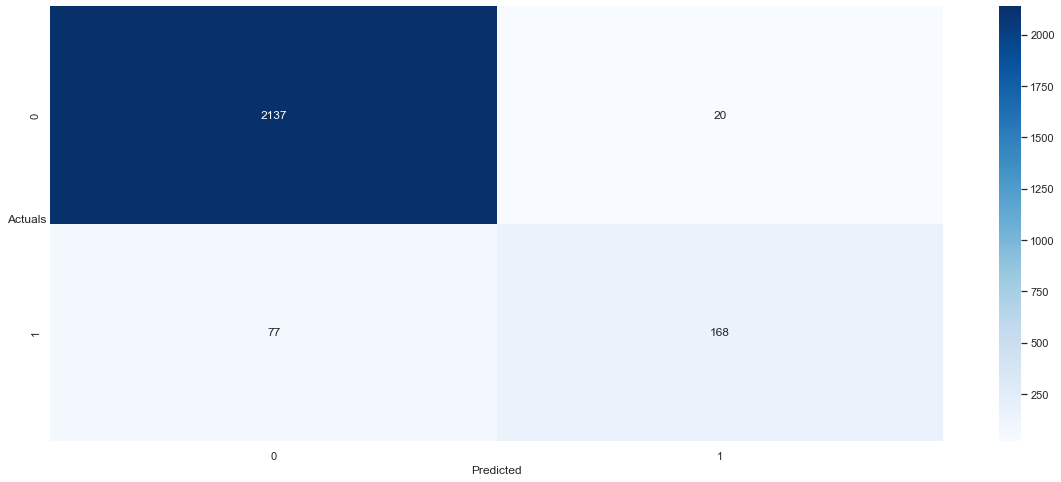

In [210]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [211]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.965     0.991     0.978      2157
           1      0.894     0.686     0.776       245

    accuracy                          0.960      2402
   macro avg      0.929     0.838     0.877      2402
weighted avg      0.958     0.960     0.957      2402



#### VALIDATION ON TEST DATA:

In [107]:
y_prob_pred_test = model25.predict(Default_test)
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [108]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.957     0.988     0.972      1041
           1      0.882     0.678     0.767       143

    accuracy                          0.950      1184
   macro avg      0.919     0.833     0.869      1184
weighted avg      0.948     0.950     0.947      1184



#### With threshold value at 0.5, the model is able to correctly predict 95% of total predictions in the test data set. while the recall score is only 67%

#### FINDING OPTIMAL THRESHOLD:

In [109]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [110]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11024863265973511

In [111]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [112]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.907     0.947      2157
           1      0.533     0.931     0.678       245

    accuracy                          0.910      2402
   macro avg      0.762     0.919     0.813      2402
weighted avg      0.945     0.910     0.920      2402



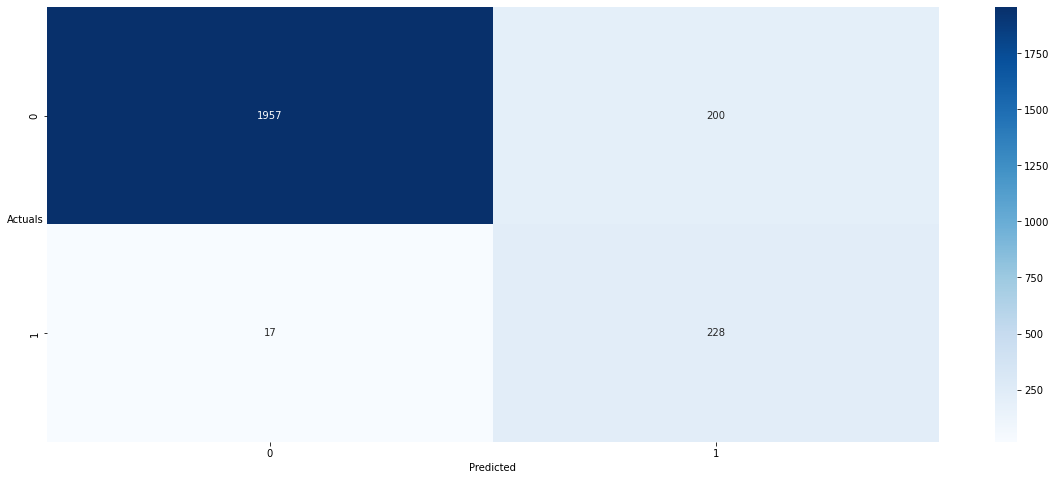

In [113]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### VALIDATION ON TEST DATA:

In [114]:
y_prob_pred_test = model25.predict(Default_test)

In [115]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

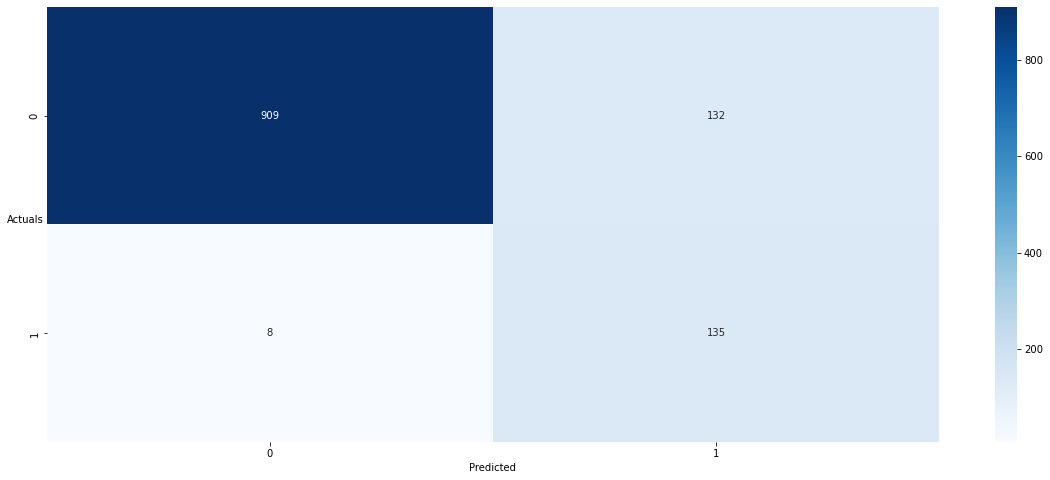

In [116]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [117]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.873     0.928      1041
           1      0.506     0.944     0.659       143

    accuracy                          0.882      1184
   macro avg      0.748     0.909     0.794      1184
weighted avg      0.933     0.882     0.896      1184



#### With an optimal cut-off at 0.11, the model is able to correctly predict 88% of the total predictions in the test data set. Also, this model is able to correctly identify 94% of defaulters as compared to our previous model which was able to identify only 67%

#### UNIVARIATE  & BIVARIATE ANALYSIS:

In [118]:
important_feat = company_X[['Equity_Paid_Up','Total_Debt','Book_Value_Adj_Unit_Curr','CEPS_annualised_Unit_Curr','Current_Ratio_Latest',
'Debtors_Ratio_Latest','PBITM_perc_Latest','Debtors_Velocity_Days','Value_of_Output_by_Gross_Block']]

In [119]:
sns.set(color_codes=True)

Skew: 1.1419004485187514
Kurtosis: -0.07259732882100511


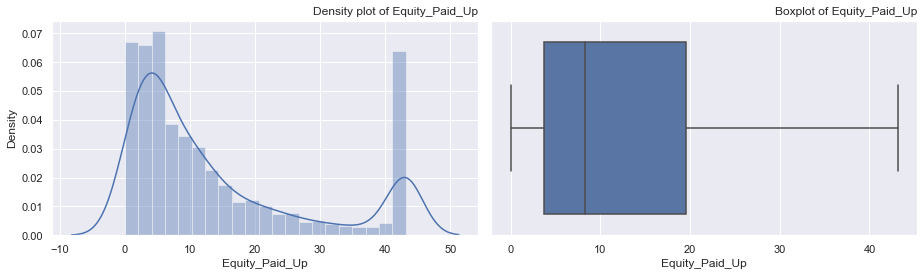

In [120]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['Equity_Paid_Up'])
print('Skew:', important_feat['Equity_Paid_Up'].skew())
print('Kurtosis:', important_feat['Equity_Paid_Up'].kurtosis())
plt.title('Density plot of Equity_Paid_Up', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['Equity_Paid_Up'])
plt.title('Boxplot of Equity_Paid_Up', loc='right')
plt.tight_layout()
plt.show()

Skew: 1.1979699912335378
Kurtosis: -0.27268197638685177


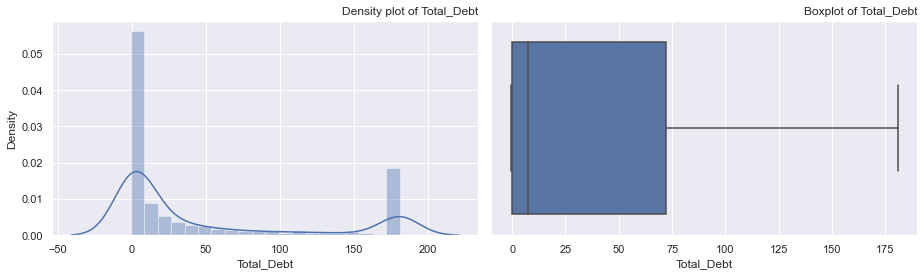

In [121]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['Total_Debt'])
print('Skew:', important_feat['Total_Debt'].skew())
print('Kurtosis:', important_feat['Total_Debt'].kurtosis())
plt.title('Density plot of Total_Debt', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['Total_Debt'])
plt.title('Boxplot of Total_Debt', loc='right')
plt.tight_layout()
plt.show()

Skew: 0.7951556683716688
Kurtosis: -0.0007937265612194544


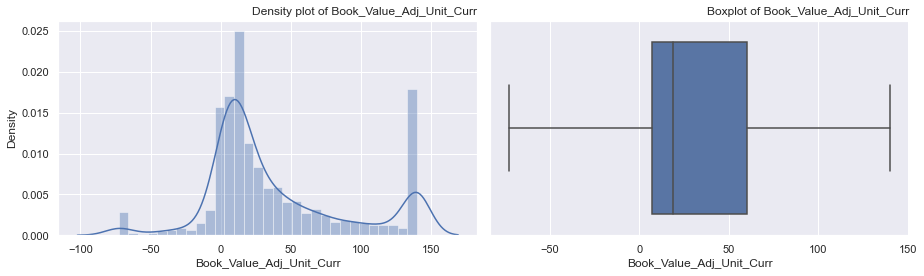

In [122]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['Book_Value_Adj_Unit_Curr'])
print('Skew:', important_feat['Book_Value_Adj_Unit_Curr'].skew())
print('Kurtosis:', important_feat['Book_Value_Adj_Unit_Curr'].kurtosis())
plt.title('Density plot of Book_Value_Adj_Unit_Curr', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['Book_Value_Adj_Unit_Curr'])
plt.title('Boxplot of Book_Value_Adj_Unit_Curr', loc='right')
plt.tight_layout()
plt.show()

Skew: 0.6881855165232086
Kurtosis: -0.1649586765337352


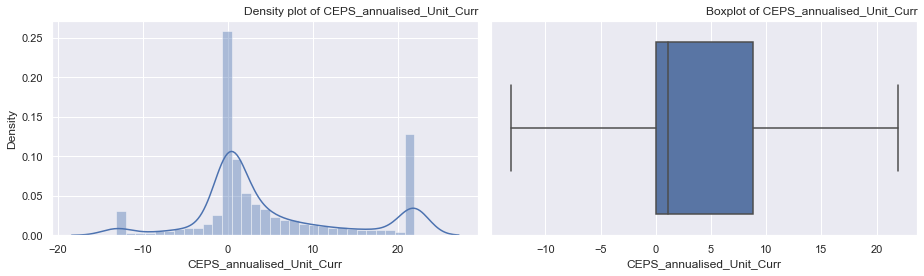

In [123]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['CEPS_annualised_Unit_Curr'])
print('Skew:', important_feat['CEPS_annualised_Unit_Curr'].skew())
print('Kurtosis:', important_feat['CEPS_annualised_Unit_Curr'].kurtosis())
plt.title('Density plot of CEPS_annualised_Unit_Curr', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['CEPS_annualised_Unit_Curr'])
plt.title('Boxplot of CEPS_annualised_Unit_Curr', loc='right')
plt.tight_layout()
plt.show()

Skew: 1.0484232271134244
Kurtosis: -0.306953168833068


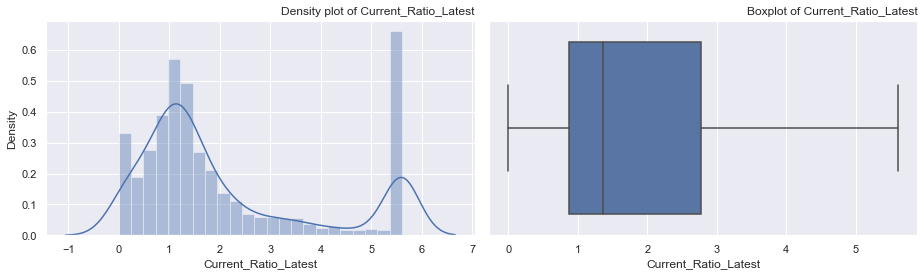

In [124]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['Current_Ratio_Latest'])
print('Skew:', important_feat['Current_Ratio_Latest'].skew())
print('Kurtosis:', important_feat['Current_Ratio_Latest'].kurtosis())
plt.title('Density plot of Current_Ratio_Latest', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['Current_Ratio_Latest'])
plt.title('Boxplot of Current_Ratio_Latest', loc='right')
plt.tight_layout()
plt.show()

Skew: 1.175363802722659
Kurtosis: 0.18040172413072764


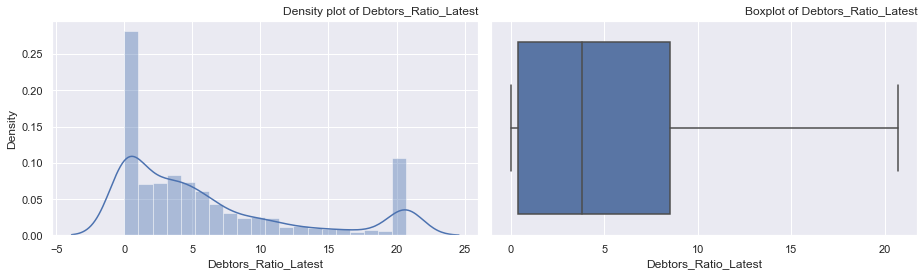

In [125]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['Debtors_Ratio_Latest'])
print('Skew:', important_feat['Debtors_Ratio_Latest'].skew())
print('Kurtosis:', important_feat['Debtors_Ratio_Latest'].kurtosis())
plt.title('Density plot of Debtors_Ratio_Latest', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['Debtors_Ratio_Latest'])
plt.title('Boxplot of Debtors_Ratio_Latest', loc='right')
plt.tight_layout()
plt.show()

Skew: 0.14046987683898274
Kurtosis: -0.11400131205388142


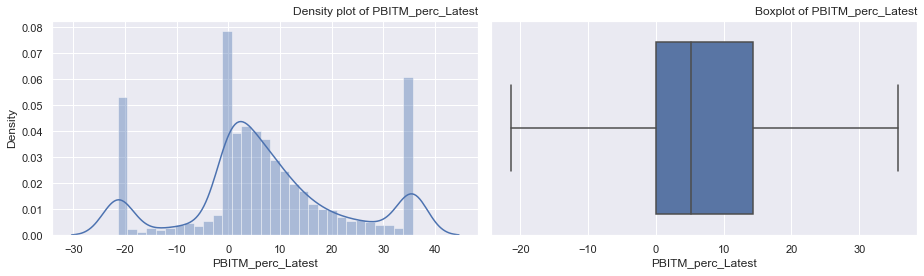

In [126]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['PBITM_perc_Latest'])
print('Skew:', important_feat['PBITM_perc_Latest'].skew())
print('Kurtosis:', important_feat['PBITM_perc_Latest'].kurtosis())
plt.title('Density plot of PBITM_perc_Latest', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['PBITM_perc_Latest'])
plt.title('Boxplot of PBITM_perc_Latest', loc='right')
plt.tight_layout()
plt.show()

Skew: 1.1360860420113066
Kurtosis: 0.07859768987405902


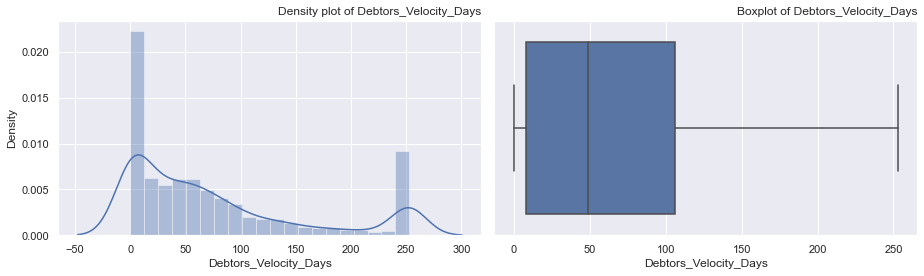

In [127]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['Debtors_Velocity_Days'])
print('Skew:', important_feat['Debtors_Velocity_Days'].skew())
print('Kurtosis:', important_feat['Debtors_Velocity_Days'].kurtosis())
plt.title('Density plot of Debtors_Velocity_Days', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['Debtors_Velocity_Days'])
plt.title('Boxplot of Debtors_Velocity_Days', loc='right')
plt.tight_layout()
plt.show()

Skew: 1.1836180223701684
Kurtosis: -0.020662024597368767


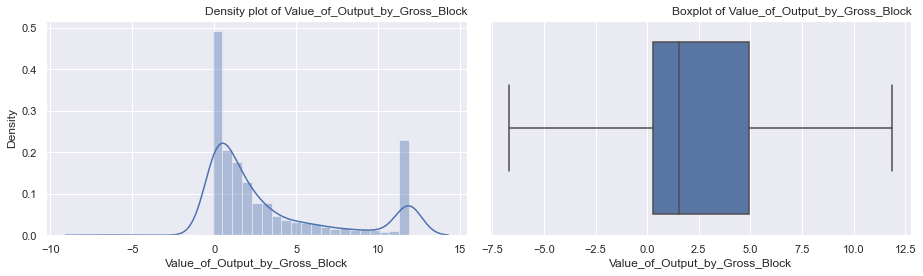

In [128]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.distplot(important_feat['Value_of_Output_by_Gross_Block'])
print('Skew:', important_feat['Value_of_Output_by_Gross_Block'].skew())
print('Kurtosis:', important_feat['Value_of_Output_by_Gross_Block'].kurtosis())
plt.title('Density plot of Value_of_Output_by_Gross_Block', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(important_feat['Value_of_Output_by_Gross_Block'])
plt.title('Boxplot of Value_of_Output_by_Gross_Block', loc='right')
plt.tight_layout()
plt.show()

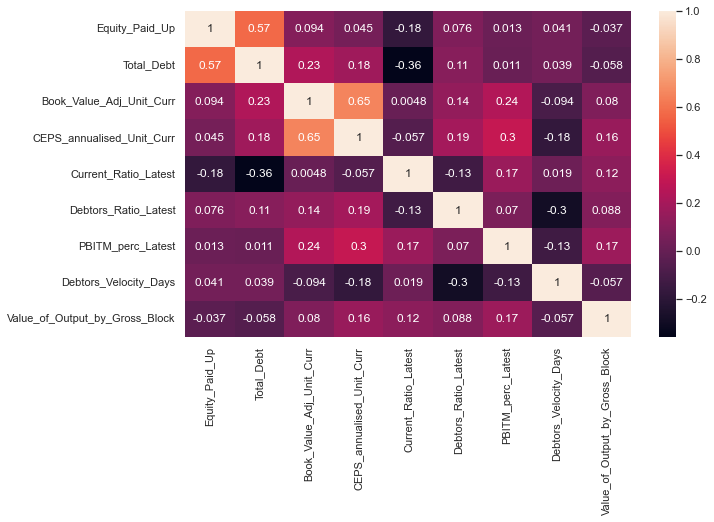

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(important_feat.corr(), annot=True)
plt.show()

#### Ramdom Forest Model:

In [131]:
from sklearn.ensemble import RandomForestClassifier
RF_Classifier = RandomForestClassifier(n_estimators=101, n_jobs=-1, random_state=101)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(company_X,company_y,test_size=0.33, random_state=42, stratify=company_y)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2402, 64), (1184, 64), (2402,), (1184,))

In [134]:
y_train.value_counts(normalize=True)

0    0.891757
1    0.108243
Name: Default, dtype: float64

In [135]:
y_test.value_counts(normalize=True)

0    0.891892
1    0.108108
Name: Default, dtype: float64

In [136]:
RF_Classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=101, n_jobs=-1, random_state=101)

In [137]:
y_pred_train = RF_Classifier.predict(X_train)

In [138]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      1.00      1.00       260

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



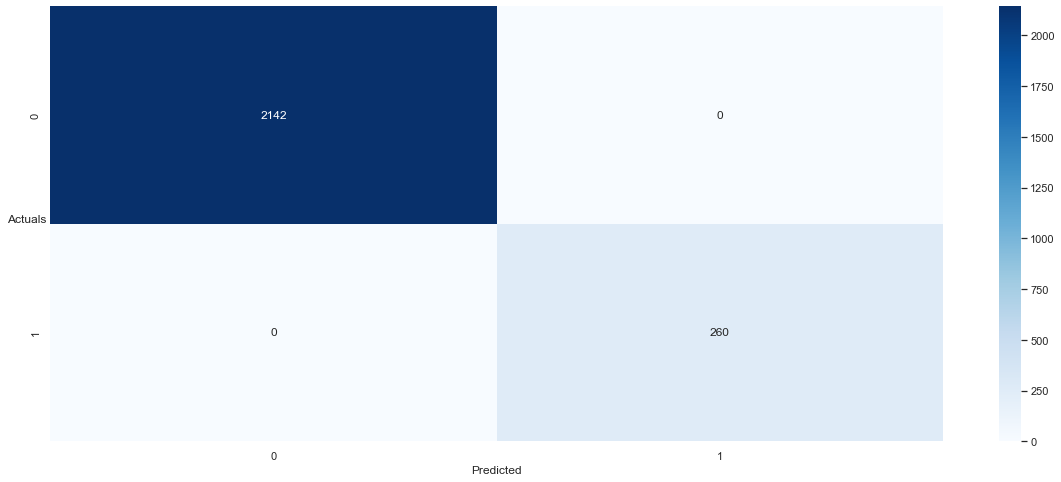

In [139]:
sns.heatmap((metrics.confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [140]:
y_pred_test = RF_Classifier.predict(X_test)

In [141]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.97      0.87      0.91       128

    accuracy                           0.98      1184
   macro avg       0.97      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



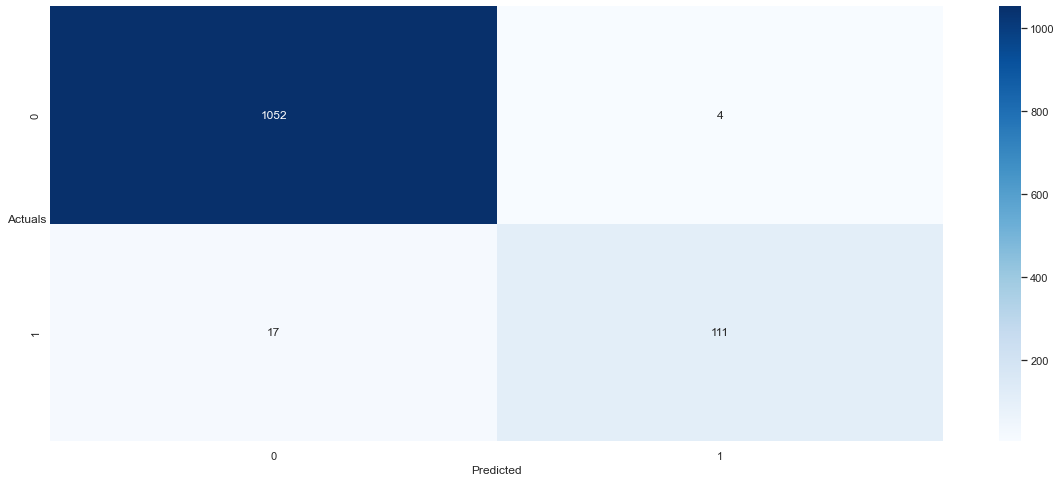

In [142]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [143]:
param = {
    "max_depth": [5,6,7],
    "min_samples_split": [6, 5, 4],
    "min_samples_leaf": [11,15,19],
    "max_features": [20, 30, 40]}

In [144]:
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(param_grid=param, estimator=RF_Classifier, cv=4, verbose=True, scoring='recall')
Grid.fit(X_train,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_estimators=101, n_jobs=-1,
                                              random_state=101),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [20, 30, 40],
                         'min_samples_leaf': [11, 15, 19],
                         'min_samples_split': [6, 5, 4]},
             scoring='recall', verbose=True)

In [145]:
Grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=15,
                       min_samples_split=6, n_estimators=101, n_jobs=-1,
                       random_state=101)

In [146]:
best = Grid.best_estimator_

In [147]:
y = best.predict(X_train)

In [148]:
print(metrics.classification_report(y_train, y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2142
           1       0.91      0.88      0.89       260

    accuracy                           0.98      2402
   macro avg       0.95      0.94      0.94      2402
weighted avg       0.98      0.98      0.98      2402



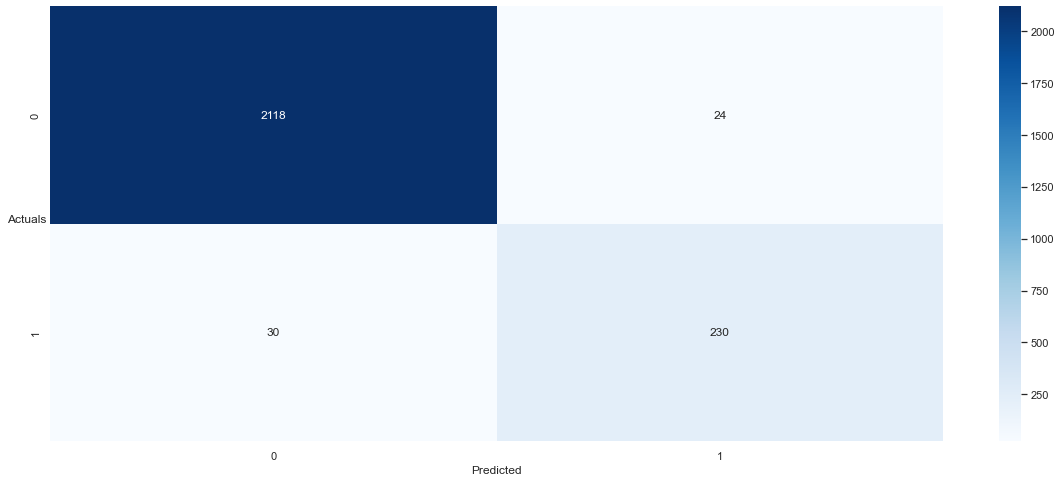

In [149]:
sns.heatmap((metrics.confusion_matrix(y_train,y)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [150]:
y = best.predict(X_test)

In [151]:
print(metrics.classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.96      0.87      0.91       128

    accuracy                           0.98      1184
   macro avg       0.97      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



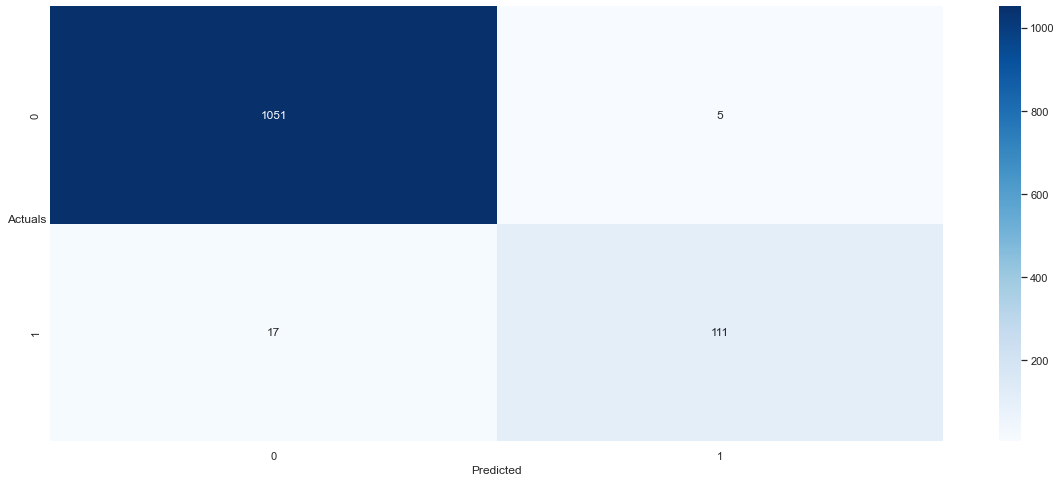

In [152]:
sns.heatmap((metrics.confusion_matrix(y_test,y)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC: 0.997


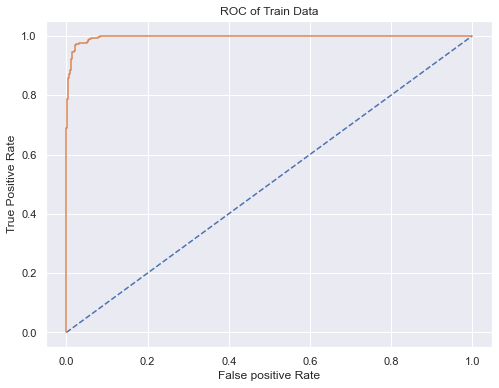

In [153]:
probs = best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

AUC: 0.989


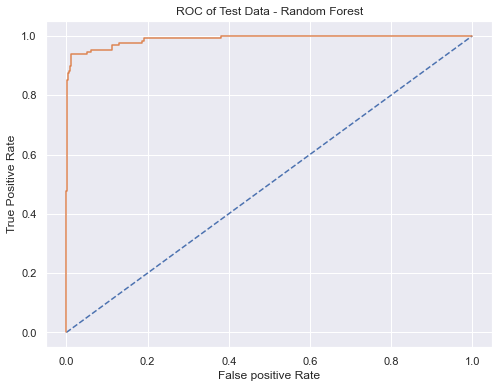

In [207]:
probs = best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data - Random Forest')
plt.plot(train_fpr, train_tpr);

In [197]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(company_X,company_y,test_size=0.33, random_state=42, stratify=company_y)

In [198]:
LDA = LinearDiscriminantAnalysis()
X_trainSC = Scale.fit_transform(X_train)
X_testSC = Scale.transform(X_test)

LDA.fit(X_trainSC, y_train)

LinearDiscriminantAnalysis()

In [199]:
y_pred_train = LDA.predict(X_train)

In [167]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2142
           1       0.82      0.56      0.67       260

    accuracy                           0.94      2402
   macro avg       0.88      0.77      0.82      2402
weighted avg       0.93      0.94      0.93      2402



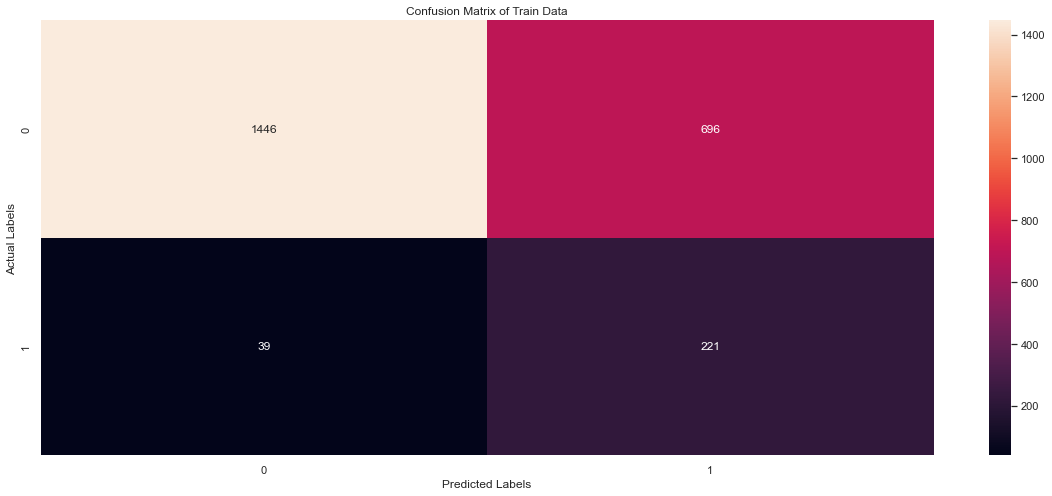

In [200]:
sns.heatmap(metrics.confusion_matrix(y_train, y_pred_train), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Train Data');

In [201]:
y_pred_test = LDA.predict(X_test)

In [202]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.66      0.78      1056
           1       0.23      0.83      0.36       128

    accuracy                           0.67      1184
   macro avg       0.60      0.74      0.57      1184
weighted avg       0.89      0.67      0.74      1184



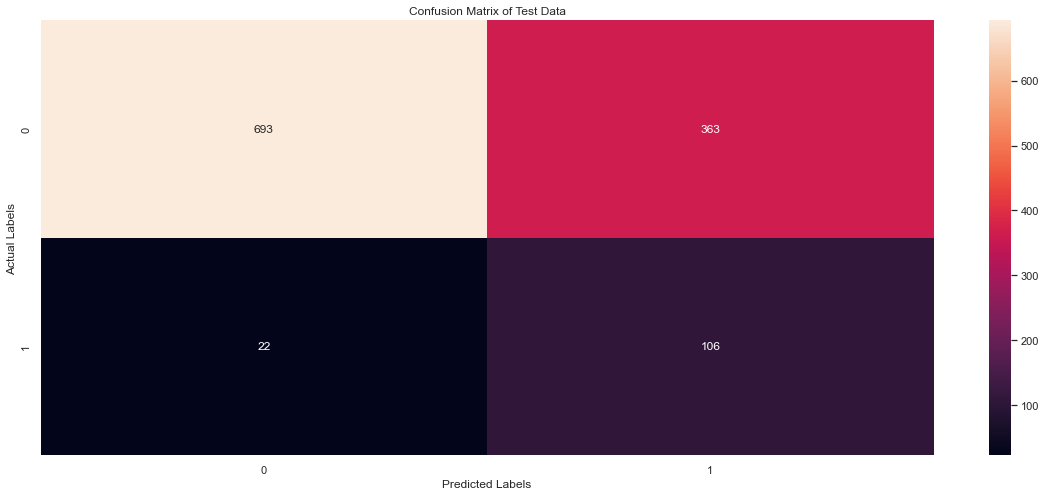

In [203]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

AUC: 0.793


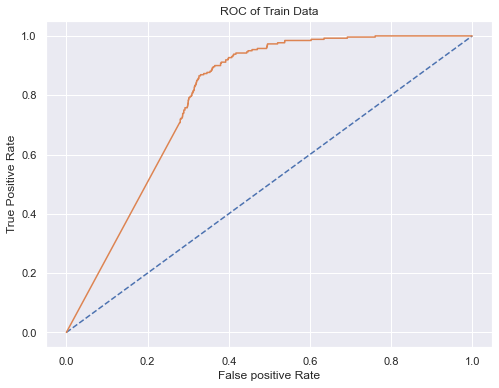

In [204]:
probs = LDA_Classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

AUC: 0.786


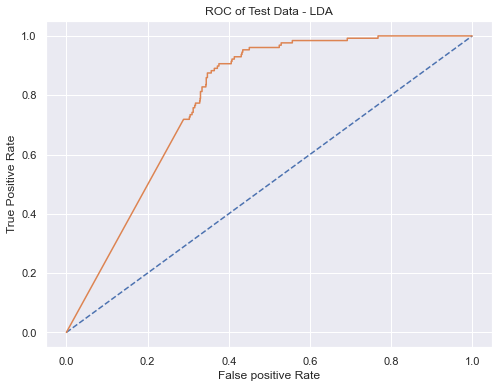

In [206]:
probs = LDA_Classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data - LDA')
plt.plot(train_fpr, train_tpr);